<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Executive-Summary" data-toc-modified-id="Executive-Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Executive Summary</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Load-Data-And-Libraries" data-toc-modified-id="Load-Data-And-Libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load Data And Libraries</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Filter-for-Chosen-Zip-Codes" data-toc-modified-id="Filter-for-Chosen-Zip-Codes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Filter for Chosen Zip Codes</a></span><ul class="toc-item"><li><span><a href="#Upcoming-Real-Estate-Markets-to-Watch-in-2019" data-toc-modified-id="Upcoming-Real-Estate-Markets-to-Watch-in-2019-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Upcoming Real Estate Markets to Watch in 2019</a></span><ul class="toc-item"><li><span><a href="#San-Jose,-CA" data-toc-modified-id="San-Jose,-CA-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>San Jose, CA</a></span></li><li><span><a href="#Las-Vegas,-NV" data-toc-modified-id="Las-Vegas,-NV-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Las Vegas, NV</a></span></li><li><span><a href="#Phoenix,-AZ" data-toc-modified-id="Phoenix,-AZ-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Phoenix, AZ</a></span></li></ul></li></ul></li><li><span><a href="#Step-3:-Visualization-to-Finalize-the-List-of-Zip-Codes" data-toc-modified-id="Step-3:-Visualization-to-Finalize-the-List-of-Zip-Codes-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Step 3: Visualization to Finalize the List of Zip Codes</a></span><ul class="toc-item"><li><span><a href="#Result-of-Visualizations" data-toc-modified-id="Result-of-Visualizations-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Result of Visualizations</a></span></li></ul></li><li><span><a href="#Reshape-from-Wide-to-Long-Format" data-toc-modified-id="Reshape-from-Wide-to-Long-Format-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Reshape from Wide to Long Format</a></span><ul class="toc-item"><li><span><a href="#Version-1-of-melt_data" data-toc-modified-id="Version-1-of-melt_data-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Version 1 of melt_data</a></span></li><li><span><a href="#Version-2:-Refactored-version-1-to-melt_data" data-toc-modified-id="Version-2:-Refactored-version-1-to-melt_data-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Version 2: Refactored version 1 to melt_data</a></span></li><li><span><a href="#Version-3:--Refactored-version-2-and-reduce-size-of-data-set" data-toc-modified-id="Version-3:--Refactored-version-2-and-reduce-size-of-data-set-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Version 3:  Refactored version 2 and reduce size of data set</a></span></li></ul></li><li><span><a href="#Step-4d:-Stationarity-Check" data-toc-modified-id="Step-4d:-Stationarity-Check-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Step 4d: Stationarity Check</a></span><ul class="toc-item"><li><span><a href="#Result-of-Stationarity-check-on-time-series-data-frames" data-toc-modified-id="Result-of-Stationarity-check-on-time-series-data-frames-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Result of Stationarity check on time series data frames</a></span></li></ul></li><li><span><a href="#Step-5:-S/ARIMA-Modeling" data-toc-modified-id="Step-5:-S/ARIMA-Modeling-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Step 5: S/ARIMA Modeling</a></span><ul class="toc-item"><li><span><a href="#Sarima-forecasting-for-10-best-zip-codes" data-toc-modified-id="Sarima-forecasting-for-10-best-zip-codes-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Sarima forecasting for 10 best zip codes</a></span></li><li><span><a href="#Compare-ROI-for-10-best-zip-codes" data-toc-modified-id="Compare-ROI-for-10-best-zip-codes-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Compare ROI for 10 best zip codes</a></span></li></ul></li><li><span><a href="#Conclusion-and-Business-Recommendations" data-toc-modified-id="Conclusion-and-Business-Recommendations-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusion and Business Recommendations</a></span></li><li><span><a href="#Mod-4-Project---Starter-Notebook" data-toc-modified-id="Mod-4-Project---Starter-Notebook-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Mod 4 Project - Starter Notebook</a></span><ul class="toc-item"><li><span><a href="#Some-Notes-Before-Starting" data-toc-modified-id="Some-Notes-Before-Starting-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Some Notes Before Starting</a></span></li><li><span><a href="#Wide-Format-vs-Long-Format" data-toc-modified-id="Wide-Format-vs-Long-Format-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Wide Format vs Long Format</a></span></li><li><span><a href="#Helper-Functions-Provided" data-toc-modified-id="Helper-Functions-Provided-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Helper Functions Provided</a></span></li></ul></li><li><span><a href="#Code-Remnents" data-toc-modified-id="Code-Remnents-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Code Remnents</a></span></li></ul></div>

# Executive Summary

The goal of this market analysis is to identify the 5 best zip codes in the United States and evaluate their potential future growth for investment purposes. For this investigation, the term "best" is defined as a demonstrated high growth Return on Investment (ROI) following the 2008 market crash and to be a highly regarded metropolitan area forecasted for excellent growth potential in 2019 according to market research.  

Based on statistical analysis, the recommendation of this report for a real estate investment in the best zip codes in the United States for highest potential ROI in 2019-2020 based on data forecast and market research are: 
- Mountain View, CA (94043) with 60%
- Sunnyvale, CA (98089) with 54%
- Palo Alto, CA (94301) with 33%
- Palo Alto, CA (94302) with 33%
- Las Vegas, NV (89104) with 31%
- Las Vegas, NV (89107) with 30%


# Introduction

The goal of this market analysis is to identify the 5 best zip codes in the United States and evaluate their potential future growth for investment purposes. For this investigation, the term "best" is defined as a demonstrated high-growth ROI following the 2008 market crash and a high forecasted area for growth potential. 

The data has been sourced from Zillow, a leading real estate and rental marketplace dedicated to empowering consumers with data and knowledge.  The original data set is comprised of house sales over a 22 year span in over 14,000 zip codes in the United States.  The data will be evaluated and cleaned prior to analysis. 

The methodology to arrive at the 5 best zip codes will be conducted in 3 defined steps.  First, the data set will be used to calculate the return on investment (ROI) of each zip code from the time period following the 2008 market crash until current day. The house prices after the crash in 2008 were stagnant until March 2011, which will be the recovery data used for this analysis.  The zip codes will then be ranked according to the ROI in descending order.  

The second step is to conduct market research to identify the real estate markets forecasted to have high growth potential in 2019.  Then using the ROI data and market research, the top 10 or 11 zip codes will be identified and used for modeling in step 3.

The third and final step will be to analyze the data for trends and model the data to forecast for potential growth in 2019 and 2020.  

# Load Data And Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import itertools
import statsmodels.api as sm
import operator

In [2]:
'''Provided to help with visualizations'''

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

In [3]:
data = pd.read_csv("zillow_data.csv")
data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


# Exploratory Data Analysis
In this section, the datatype of RegionName is changed from an integer to a string, 3 columns for Return On Investment (ROI) are added and the null data found in the ROI columns is deleted.

In [5]:
''' The zip codes are stored as integers '''

data.RegionName.dtypes

dtype('int64')

In [6]:
''' The zip codes are changed to objects'''

data['RegionName'] = data['RegionName'].astype(str)
display(data.RegionName.dtypes)

dtype('O')

In [7]:
''' 
Three columns are added for the ROI:

t_growth is the total growth for all dates in the data set (April, 1996 to April, 2018)
    
growth1 is the growth from the start of the data set until the height of the market (April 2006)
    prior to the crash in 2008
        
growth2 is the growth from the start of the recovery (March 2011) until the end of the data set
    
Information about dates and the market crash was found at:
https://www.washingtonpost.com/news/business/wp/2018/10/04/feature/10-years-later-how-the-housing-market-has-changed-since-the-crash/
    
'''

data['t_growth'] = (data['2018-04'] - data['1996-04']) / data['1996-04']
data['growth1'] = (data['2006-04'] - data['1996-04']) / data['1996-04']
data['growth2'] = (data['2018-04'] - data['2011-03']) / data['2011-03']

In [8]:
''' Null values are deleted '''
data.info()
display(data.iloc[:,272:275].head(2))
display(data.iloc[:,272].isna().sum())
display(data.iloc[:,273].isna().sum())
display(data.iloc[:,274].isna().sum())

#drop the null values
data = data.dropna(axis=0,subset=['t_growth'])

#confirm null values where dropped
display(data.iloc[:,272].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 275 entries, RegionID to growth2
dtypes: float64(222), int64(48), object(5)
memory usage: 30.9+ MB


,t_growth,growth1,growth2
0,2.083782,1.672950,0.410428
1,0.365295,-0.132372,0.592281


1039

1039

275

0

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13684 entries, 0 to 14722
Columns: 275 entries, RegionID to growth2
dtypes: float64(222), int64(48), object(5)
memory usage: 28.8+ MB


# Filter for Chosen Zip Codes

## Upcoming Real Estate Markets to Watch in 2019



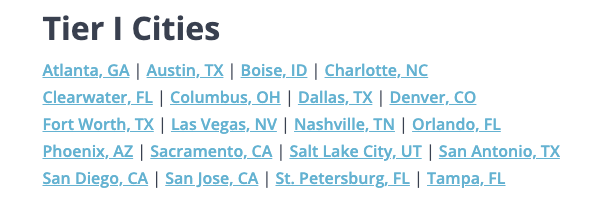

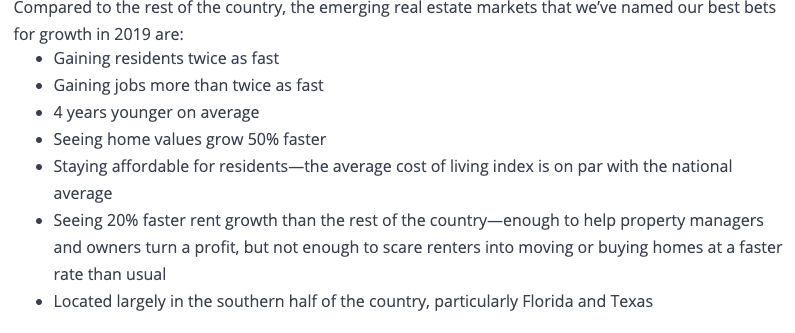

Source: https://www.buildium.com/blog/up-and-coming-real-estate-markets-2019/

In [9]:
'''
In conjunction with the housing forecast research for the top 20 markets in 2019 and the Zillow data base, 
the best zip codes will be determined by their ROI since the market crash. A high ROI in the growth2 column 
and inclusion in the top 20 markets will drive the selection of zip codes.

The result is that the San Jose, Phoenix and Las Vegas zip codes are the best zip codes to model and forecast.

'''
display(data.loc[:,['RegionName','City','State','Metro','t_growth','growth2']].sort_values('growth2',ascending=False).head(40))


,RegionName,City,State,Metro,t_growth,growth2
475,11216,New York,NY,New York,9.942505,2.134091
2409,33404,Riviera Beach,FL,Miami-Fort Lauderdale,1.371479,2.089450
4436,33936,Lehigh Acres,FL,Fort Myers,1.046083,2.020408
1853,94804,Richmond,CA,San Francisco,1.820198,1.954740
5328,94089,Sunnyvale,CA,San Jose,4.840271,1.937196
474,85008,Phoenix,AZ,Phoenix,2.620130,1.896104
2580,94043,Mountain View,CA,San Jose,6.113130,1.867468
3794,33056,Miami Gardens,FL,Miami-Fort Lauderdale,2.234551,1.860870
257,33064,Pompano Beach,FL,Miami-Fort Lauderdale,2.050409,1.848601
5738,94301,Palo Alto,CA,San Jose,5.791261,1.813664


### San Jose, CA

San Jose, CA one of twenty tier 1 cities to watch in 2019 and supplemented with zillow zip code data, post-crash growth since 2011.

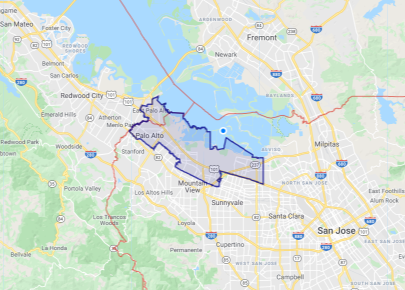

In [10]:
''' The best San Jose zip codes and how they compare to the ones the bottom with the least ROI'''

SanJose = data.loc[(data['Metro'] == 'San Jose')]
display(SanJose[['City','State','Metro','RegionName','t_growth','growth2']].sort_values('growth2',ascending=False).head(5))
display(SanJose[['City','State','Metro','RegionName','t_growth','growth2']].sort_values('growth2',ascending=False).tail(5))


,City,State,Metro,RegionName,t_growth,growth2
5328,Sunnyvale,CA,San Jose,94089,4.840271,1.937196
2580,Mountain View,CA,San Jose,94043,6.113130,1.867468
5738,Palo Alto,CA,San Jose,94301,5.791261,1.813664
2054,Palo Alto,CA,San Jose,94303,6.304034,1.805727
582,Sunnyvale,CA,San Jose,94086,5.207474,1.682818


,City,State,Metro,RegionName,t_growth,growth2
6969,San Jose,CA,San Jose,95138,2.773019,0.891847
1506,Morgan Hill,CA,San Jose,95037,2.327827,0.817488
11619,San Juan Bautista,CA,San Jose,95045,1.291791,0.655972
1750,Hollister,CA,San Jose,95023,1.501718,0.644932
9030,Lexington Hills,CA,San Jose,95033,2.183065,0.550231


Text(0, 0.5, 'Growth percentage')

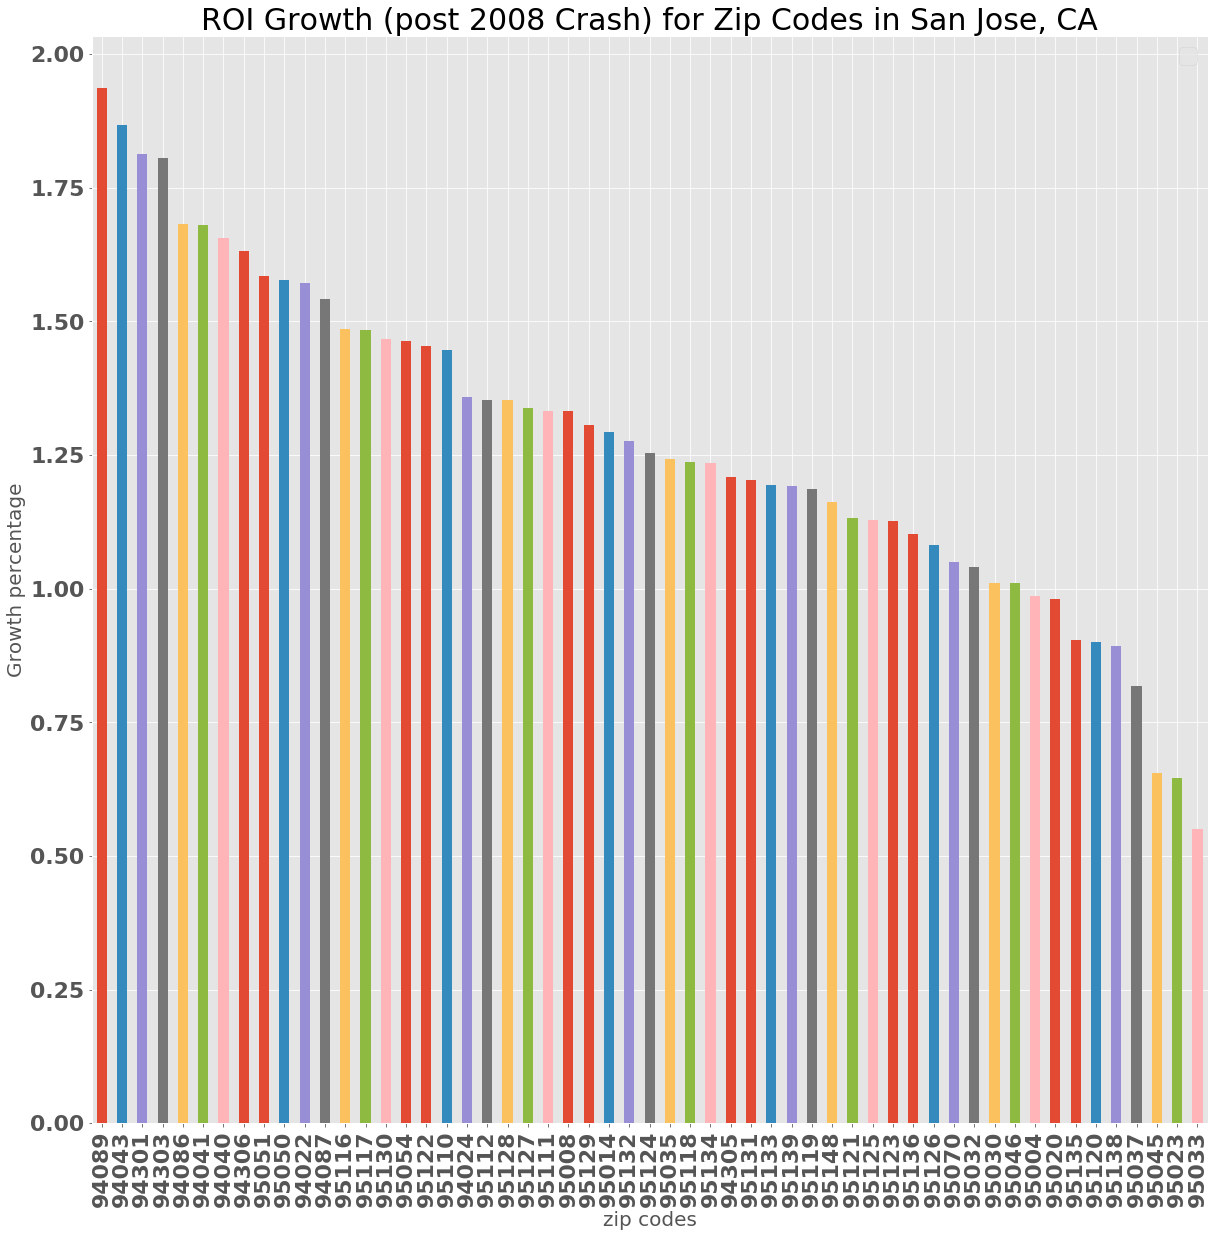

In [125]:
SanJose[['RegionName','growth2']].sort_values(by='growth2',ascending=False).plot.bar(x='RegionName', y='growth2',figsize=(20,20))
plt.title('ROI Growth (post 2008 Crash) for Zip Codes in San Jose, CA', fontsize=30)
plt.legend('')
plt.xlabel('zip codes',fontsize=20)
plt.ylabel('Growth percentage',fontsize=20)

In [12]:
''' The four best zip codes in San Jose, CA'''

Sunnyvale = data.loc[(data['RegionName'] == '94089')]
MountainView = data.loc[(data['RegionName'] == '94043')]
PaloAlto301 = data.loc[(data['RegionName'] == '94301')]
PaloAlto303 = data.loc[(data['RegionName'] == '94303')]

### Las Vegas, NV

Las Vegas, NV is another one of twenty tier 1 cities to watch in 2019 with high post-crash growth since 2011.

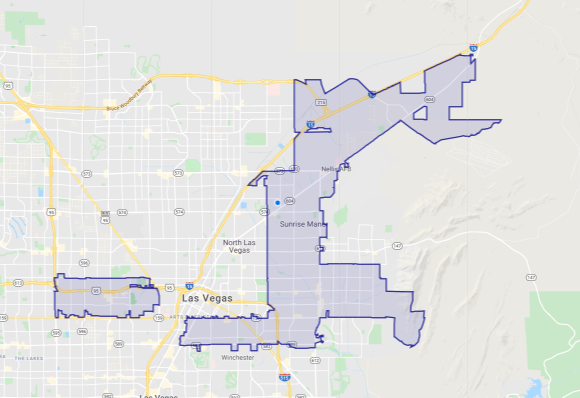

In [13]:
''' The top 4 zip codes outperform the rest of the Las Vegas zip codes'''

LasVegas = data.loc[(data['Metro'] == 'Las Vegas')]
display(LasVegas[['City','State','Metro','RegionName','t_growth','growth2']].sort_values('growth2',ascending=False).head())
display(LasVegas[['City','State','Metro','RegionName','t_growth','growth2']].sort_values('growth2',ascending=False).tail())



,City,State,Metro,RegionName,t_growth,growth2
433,Las Vegas,NV,Las Vegas,89110,1.052192,1.719225
815,Las Vegas,NV,Las Vegas,89115,0.902703,1.682927
2934,Las Vegas,NV,Las Vegas,89107,1.125677,1.602122
1960,Las Vegas,NV,Las Vegas,89104,1.199367,1.590062
115,Las Vegas,NV,Las Vegas,89108,1.041951,1.445093


,City,State,Metro,RegionName,t_growth,growth2
9004,Las Vegas,NV,Las Vegas,89179,1.052953,0.602544
6532,Boulder City,NV,Las Vegas,89005,1.016818,0.515800
6026,Mesquite,NV,Las Vegas,89027,0.760626,0.476548
7787,Laughlin,NV,Las Vegas,89029,0.381098,0.354260
12407,Mesquite,NV,Las Vegas,89034,0.666327,0.349587


Text(0, 0.5, 'Growth percentage')

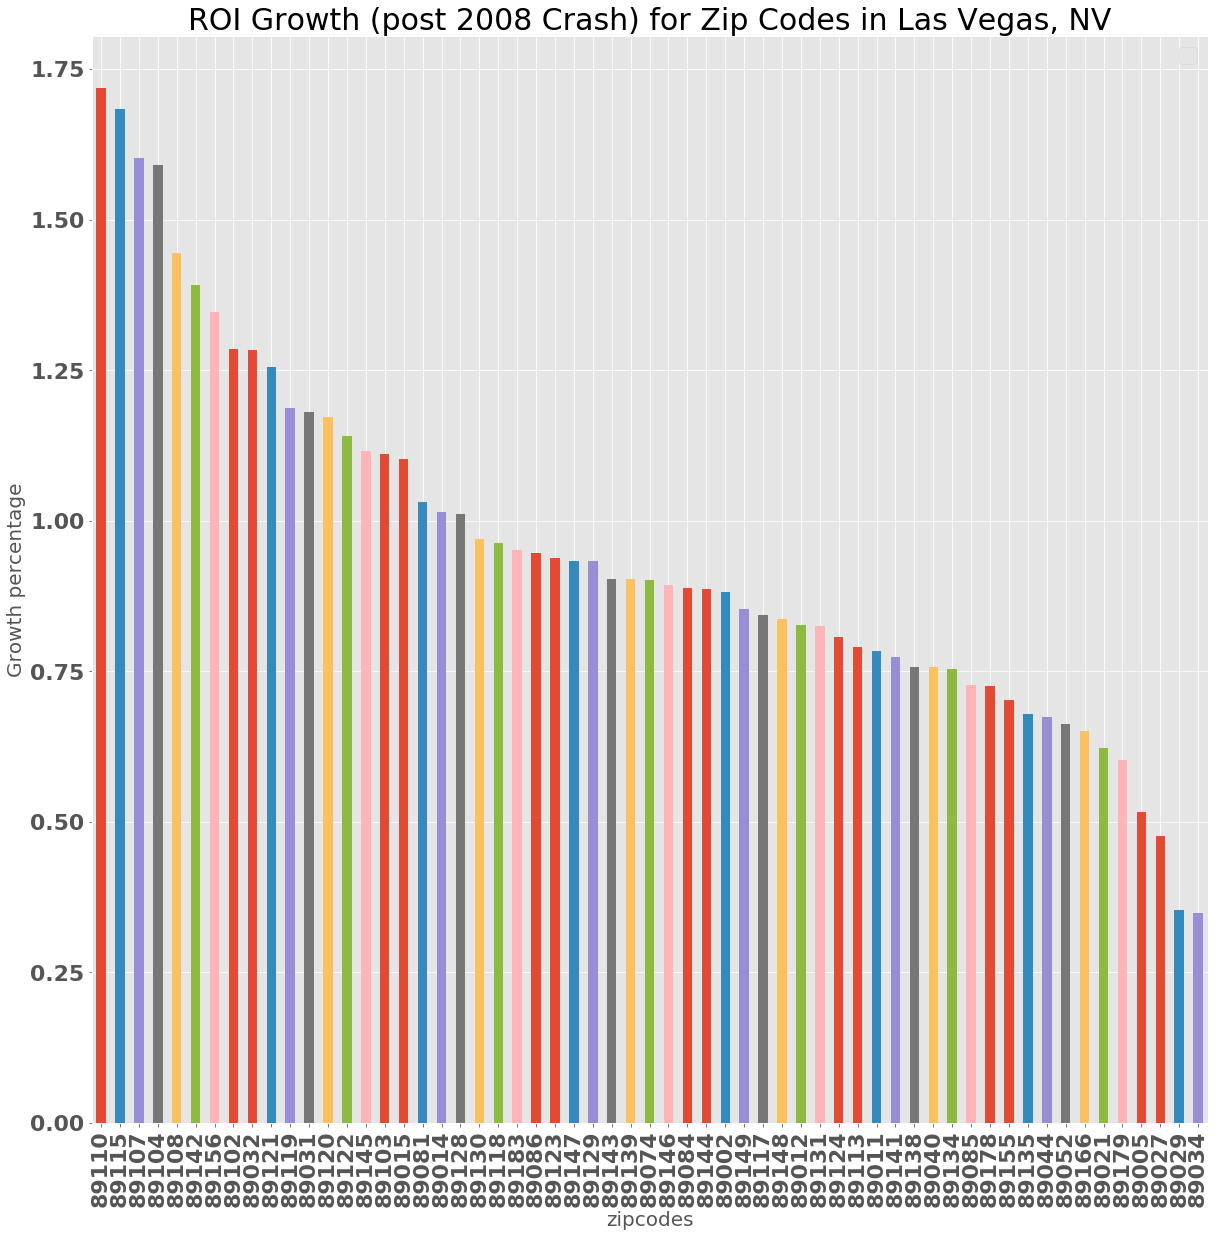

In [14]:
LasVegas[['RegionName','growth2']].sort_values(by='growth2',ascending=False).plot.bar(x='RegionName', y='growth2',figsize=(20,20))
plt.title('ROI Growth (post 2008 Crash) for Zip Codes in Las Vegas, NV', fontsize=30)
plt.legend('')
plt.xlabel('zipcodes', fontsize=20)
plt.ylabel('Growth percentage', fontsize=20)

In [15]:
''' The four best zip codes in Las Vegas, NV'''

LasVegas10 = data.loc[(data['RegionName'] == '89110')]
LasVegas15 = data.loc[(data['RegionName'] == '89115')]
LasVegas07 = data.loc[(data['RegionName'] == '89107')]
LasVegas04 = data.loc[(data['RegionName'] == '89104')]

### Phoenix, AZ

A third region to consider is Phoenix, AZ.  It is also on the list of twenty tier 1 cities to watch in 2019 and had some zip codes with high post-crash growth since 2011.

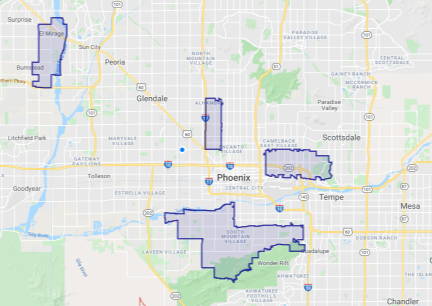

In [16]:
Phoenix = data.loc[(data['State'] == 'AZ')]
display(Phoenix[['City','State','Metro','RegionName','t_growth','growth2']].sort_values('growth2',ascending=False).head(5))
display(Phoenix[['City','State','Metro','RegionName','t_growth','growth2']].sort_values('growth2',ascending=False).tail(5))


,City,State,Metro,RegionName,t_growth,growth2
474,Phoenix,AZ,Phoenix,85008,2.620130,1.896104
3951,El Mirage,AZ,Phoenix,85335,0.979809,1.623944
1658,Phoenix,AZ,Phoenix,85015,2.308357,1.568233
2170,Phoenix,AZ,Phoenix,85042,1.704787,1.520446
1180,Phoenix,AZ,Phoenix,85041,1.656338,1.514667


,City,State,Metro,RegionName,t_growth,growth2
9479,Willcox,AZ,Sierra Vista,85643,0.466425,-0.082860
12778,Pearce,AZ,Sierra Vista,85625,0.444646,-0.110615
12150,San Manuel,AZ,Phoenix,85631,0.067736,-0.111276
1603,Sierra Vista,AZ,Sierra Vista,85635,0.606407,-0.137062
10100,Huachuca City,AZ,Sierra Vista,85616,0.347892,-0.154863


Text(0, 0.5, 'Growth percentage')

<Figure size 432x288 with 0 Axes>

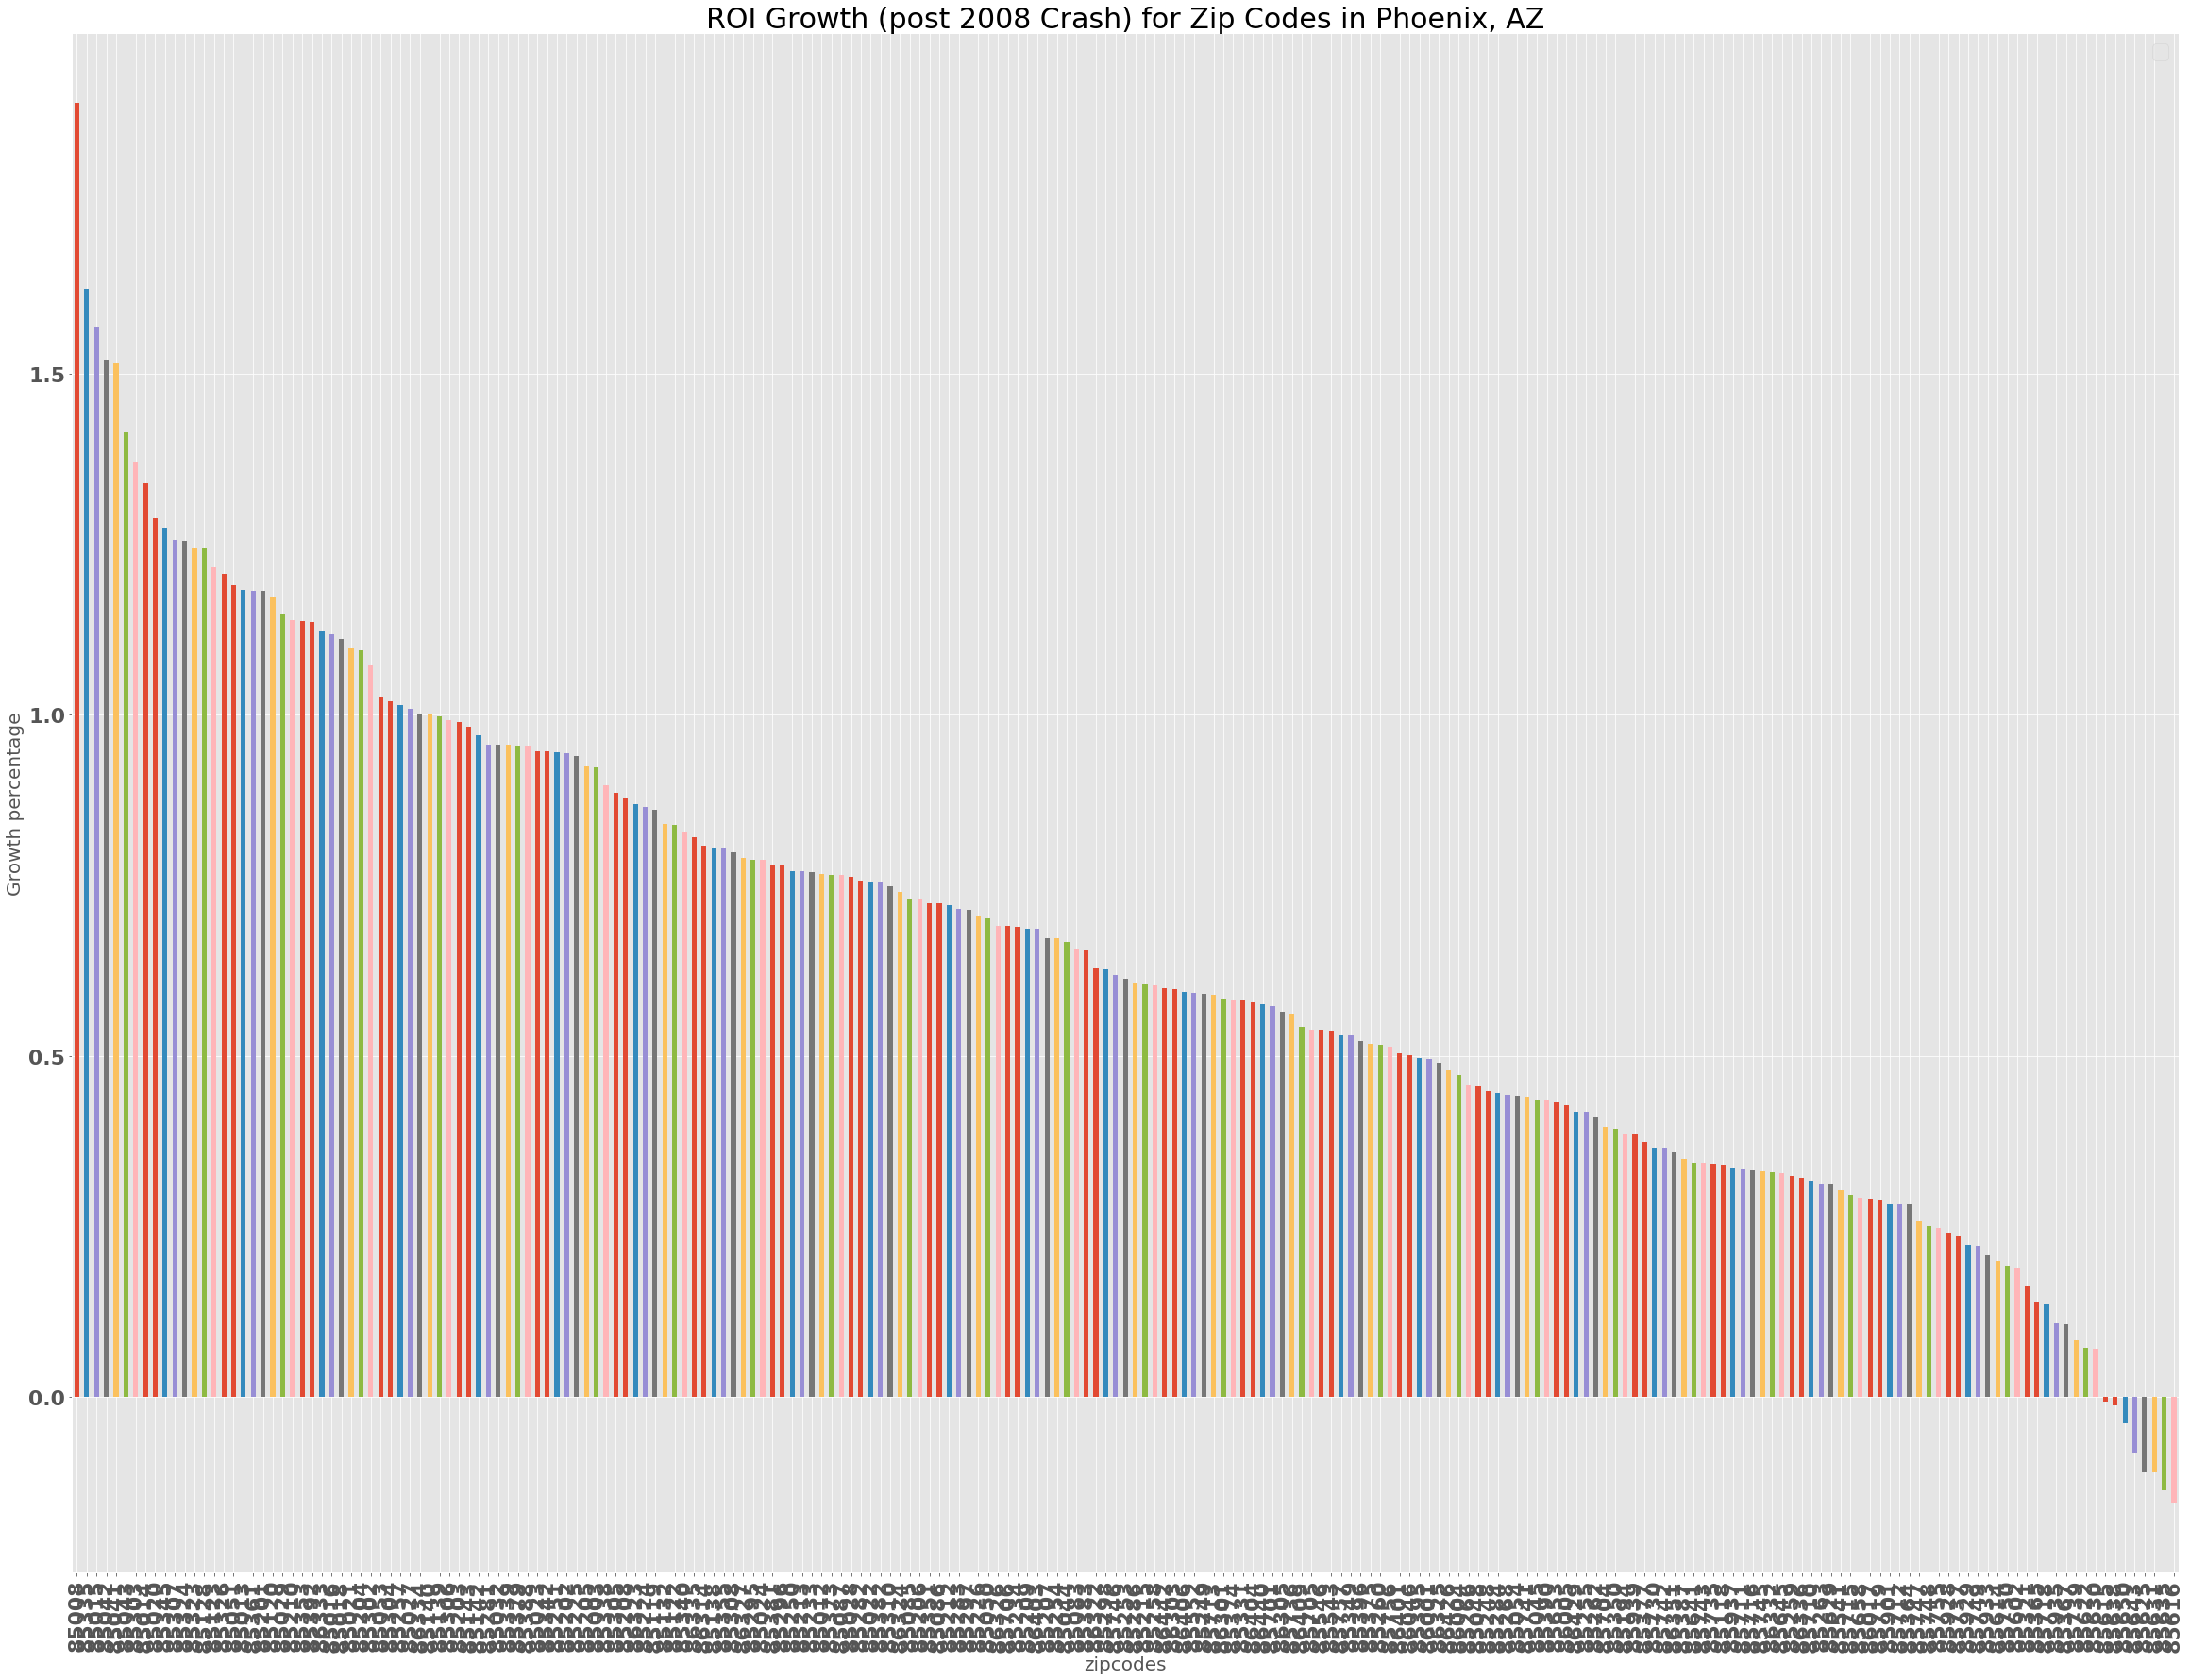

In [17]:
plt.gcf().autofmt_xdate()
Phoenix[['RegionName','growth2']].sort_values(by='growth2',ascending=False).plot.bar(x='RegionName', y='growth2',figsize=(40,30))
plt.title('ROI Growth (post 2008 Crash) for Zip Codes in Phoenix, AZ', fontsize=30)
plt.legend('')
plt.xlabel('zipcodes', fontsize =20)
plt.ylabel('Growth percentage', fontsize=20)

In [18]:
''' The five best zip codes in Phoenix, AZ'''

Phoenix008 = data.loc[(data['RegionName'] == '85008')]
ElMirage = data.loc[(data['RegionName'] == '85335')]
Phoenix015 = data.loc[(data['RegionName'] == '85015')]
Phoenix042 = data.loc[(data['RegionName'] == '85042')]
Phoenix041 = data.loc[(data['RegionName'] == '85041')]

# Step 3: Visualization to Finalize the List of Zip Codes
Currently there are 13 zip codes in contention for the top 5. There are four each from California and Nevada, and five from Arizona.  In this section the list will be narrowed down before proceeding to modeling and forecasting.

In [19]:
frames = [Sunnyvale,MountainView,PaloAlto301,PaloAlto303,LasVegas10,LasVegas15,LasVegas07,LasVegas04,Phoenix008,ElMirage,Phoenix015, Phoenix042,Phoenix041]
result = pd.concat(frames)
CA = [Sunnyvale,MountainView,PaloAlto301,PaloAlto303]
NV = [LasVegas10,LasVegas15,LasVegas07,LasVegas04]
AZ = [Phoenix008,ElMirage,Phoenix015, Phoenix042,Phoenix041]
CA_df = pd.concat(CA)
NV_df = pd.concat(NV)
AZ_df = pd.concat(AZ)


Text(0, 0.5, 'Growth percentage')

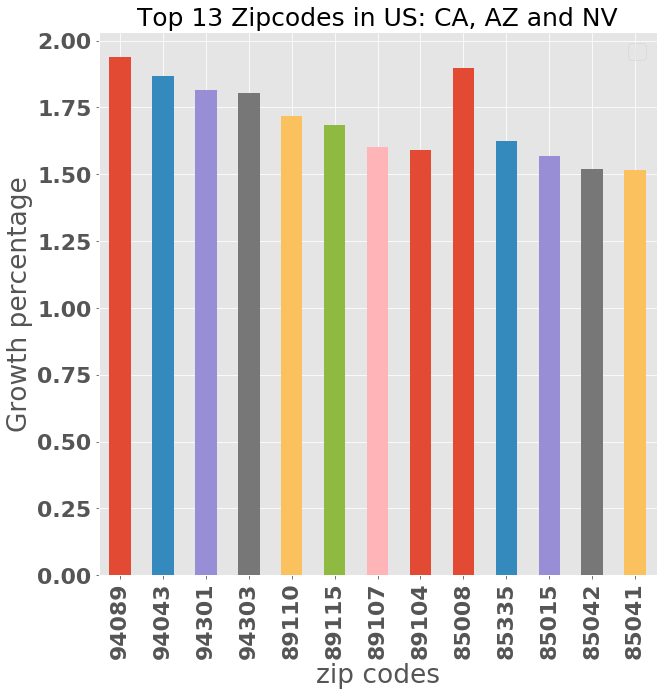

In [20]:
result.plot.bar(x='RegionName', y='growth2', figsize=(10,10))
plt.title('Top 13 Zipcodes in US: CA, AZ and NV', fontsize=25)
plt.xlabel('zip codes')
plt.legend('')
plt.ylabel('Growth percentage')

In [21]:
''' A more detailed graph so that the 3 states can be compared easier'''

CA_y = CA_df['growth2']
NV_y = NV_df['growth2']
AZ_y = AZ_df['growth2']
CA_x = CA_df['RegionName']
NV_x = NV_df['RegionName']
AZ_x = AZ_df['RegionName']

CA_mean = round(CA_df['growth2'].mean(),3)
NV_mean = round(NV_df['growth2'].mean(),3)
AZ_mean = round(AZ_df['growth2'].mean(),3)

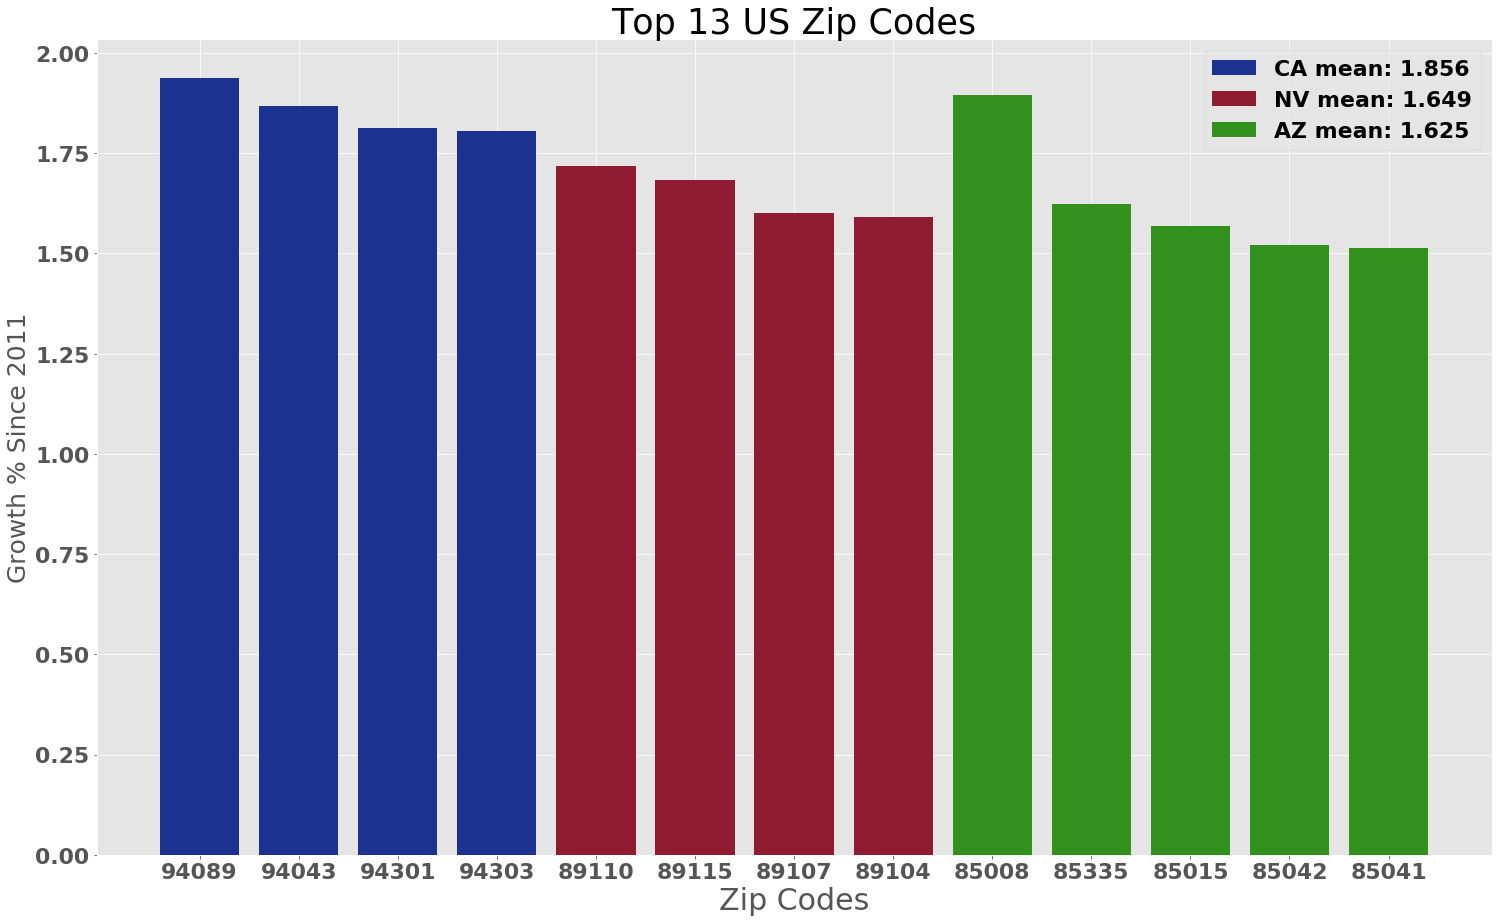

In [22]:
fig, ax = plt.subplots(figsize=(25,15))
plt.bar(CA_x,CA_y, color = '#1c3290', label = "CA mean: {}".format(CA_mean))
plt.bar(NV_x, NV_y, color = "#901c32", label = "NV mean: {}".format(NV_mean))
plt.bar(AZ_x, AZ_y, color = "#32901c", label = "AZ mean: {}".format(AZ_mean))
plt.title("Top 13 US Zip Codes", fontsize = 35)
plt.xlabel("Zip Codes", fontsize=30)
plt.ylabel("Growth % Since 2011", fontsize = 25)
plt.legend()
plt.show()

## Result of Visualizations
The mean of top zip codes from NV just barely edged out over AZ.  Moving forward the 4 zip codes from California and Nevada will be used in the modeling phase, as well as, the top 2 from AZ.  The finalists are:
- Sunnyvale 94089
- Mountain View 94043
- Palo Alto 94301
- Palo Alto 94303
- Las Vegas 89110
- Las Vegas 89115
- Las Vegas 89107
- Las Vegas 89104
- Phoenix 85008
- El Mirage 85335

# Reshape from Wide to Long Format

## Version 1 of melt_data

In [23]:
# data.head()

In [24]:
# data.drop(['RegionID','SizeRank'],inplace=True,axis=1)

In [25]:
# data.head(2)

In [26]:
# test = pd.DataFrame()

In [27]:
# test = data[2:3]

In [28]:
# test.drop(['RegionName','City','State','CountyName','t_growth','growth1','growth2'],inplace=True,axis=1)
# test.head()

In [29]:
# def melt_data(df):
#     melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName','t_growth','growth1','growth2'], var_name='time')
#     melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True,format='%Y-%m')
#     melted = melted.dropna(subset=['value'])
#     return melted
    #return melted.groupby('time').aggregate({'value':'mean'})

In [30]:
# df = melt_data(test)

In [31]:
# display(df.head())
# df.info()

In [32]:
# df.time = pd.to_datetime(df.time,format='%Y-%m')
# temp_data.Date = pd.to_datetime(temp_data.Date, format='%d/%m/%y')
# pd.to_datetime(df.columns.values[7:272], format='%Y-%m')
# xr['Frequency'] = pd.to_datetime(xr['Frequency'])
# xr.set_index('Frequency', inplace=True)
# df.set_index('time',inplace=True)

In [33]:
# df.info()
# display(df.head())

In [34]:
# df.drop(df.columns[[0,1,2,3,4,5,6,7]], axis=1, inplace=True)

In [35]:
# df.head()

In [36]:
# df.plot(figsize = (16,6));

In [37]:
# test2 = pd.DataFrame()
# test2 = data[50:51]
# df2 = melt_data(test2)
# df2.set_index('time',inplace=True)
# df2.drop(df2.columns[[0,1, 2,3,4,5,6,7]], axis=1, inplace=True)
# df2.plot(figsize = (16,6));

## Version 2: Refactored version 1 to melt_data

In [38]:
# def melt_data(df):
#     melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName','SizeRank','t_growth','growth1','growth2'], var_name='time')
#     melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True,format='%Y-%m')
#     melted = melted.dropna(subset=['value'])
#     melted.set_index('time',inplace=True)
#     melted.drop(melted.columns[[0,1,2,3,4,5,6,7,8,9]], axis=1, inplace=True)
#     return melted

In [39]:
# Test of melt_data function with a random zip code

# data.head()
# rf_test = pd.DataFrame()
# rf_test = data[2:3]

# rf_df = melt_data(rf_test)
# display(rf_df.head(2))
# rf_df.plot(figsize = (16,6));

In [40]:
# Sunnyvale.head()

In [41]:
# Test of the melt_data function with the Sunnyvale zip code

# rf_Sunnyvale = melt_data(Sunnyvale)
# rf_Sunnyvale.plot(figsize = (16,6));

In [42]:
# rf_Sunnyvale.head()

## Version 3:  Refactored version 2 and reduce size of data set


In [43]:
# Look at data, need to drop the values prior to start of recovery 

# display(Sunnyvale)
# display(Sunnyvale.iloc[:,7])
# display(Sunnyvale.iloc[:,185])

In [44]:
# All the attempts to drop the data prior to March, 2011

# Sunnyvale.head()
# df.drop(df.iloc[:, 1:3], inplace = True, axis = 1)
#df.drop(df.loc[:, 'B':'D'].columns, axis = 1)

# Sunnyvale.drop(df.columns[[:,'1996-04':'2011-02']], axis=1)
# Sunnyvale.drop(Sunnyvale.loc[:,'1996-04':'2011-02'].columns, axis=1)

# df.drop(df.columns[[1, 69]], axis=1, inplace=True)

# Sunnyvale.drop(Sunnyvale.columns[[7:185]],axis=1, inplace=True)
# Sunnyvale.drop(Sunnyvale.iloc[:,[7,185]],axis=1, inplace=True)

# df.drop(df.columns[1:], axis=1)

# temp = Sunnyvale.drop(Sunnyvale.columns[7:185], axis=1)
# temp.head()

# This finally worked to remove data prior to March, 2011
# Placed this into the melt_data function and renamed it melt_data_from_2011
# Sunnyvale.drop(Sunnyvale.columns[7:186], axis=1,inplace=True)
# Sunnyvale.head()

In [45]:
# This was used to create a new data frame instead of re-running the entire kernal 

# data = pd.read_csv("zillow_data.csv")
# data['RegionName'] = data['RegionName'].astype(str)
# data['t_growth'] = (data['2018-04'] - data['1996-04']) / data['1996-04']
# data['growth1'] = (data['2006-04'] - data['1996-04']) / data['1996-04']
# data['growth2'] = (data['2018-04'] - data['2011-03']) / data['2011-03']
# Sunnyvale = data.loc[(data['RegionName'] == '94089')]

In [46]:
def reduce_data(df):
    ''' 
    This function is called by melt_and_reduce_data and is used to reduce the data set by dates
    The input parameter is a specific zip code data frame
    The return is the data base with dates dropped 
    ''' 
    
    ''' To drop from April 1996 to Feb 2011 use the line below'''
    # df.drop(df.columns[7:186], axis=1,inplace=True)
    
    ''' More dates needed to be dropped because of the size, so April 1996 to Dec 2012 are dropped'''
    df.drop(df.columns[7:210], axis=1,inplace=True)  
    return df

In [47]:
def melt_and_reduce_data(df):
    ''' 
    This function calls reduce_data to drop dates that are not needed for modeling and 
    then converts the data frame to a time series data frame
    The input parameter is a specific zip code data frame
    The return is a new dataframe in a time series format with time as the index and house values
    '''
    
    df = reduce_data(df)
    
    melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName','SizeRank','t_growth','growth1','growth2'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    melted.set_index('time',inplace=True)
    melted.drop(melted.columns[[0,1,2,3,4,5,6,7,8,9]], axis=1, inplace=True)
    return melted

In [48]:
mSunnyvale = melt_and_reduce_data(Sunnyvale)

In [49]:
mMountainView = melt_and_reduce_data(MountainView)
mPaloAlto301 = melt_and_reduce_data(PaloAlto301)
mPaloAlto303 = melt_and_reduce_data(PaloAlto303)
mLasVegas10 = melt_and_reduce_data(LasVegas10)
mLasVegas15 = melt_and_reduce_data(LasVegas15)
mLasVegas07 = melt_and_reduce_data(LasVegas07)
mLasVegas04 = melt_and_reduce_data(LasVegas04)

In [50]:
mPhoenix008 = melt_and_reduce_data(Phoenix008)
mElMirage = melt_and_reduce_data(ElMirage)

In [51]:
# Annika - plot all on same graph?

# frames = [mSunnyvale,mMountainView,mPaloAlto301,mPaloAlto303,mLasVegas10,mLasVegas15,mLasVegas07,mLasVegas04]
# result = pd.concat(frames)
# result.plot(title="", figsize=(20,20))

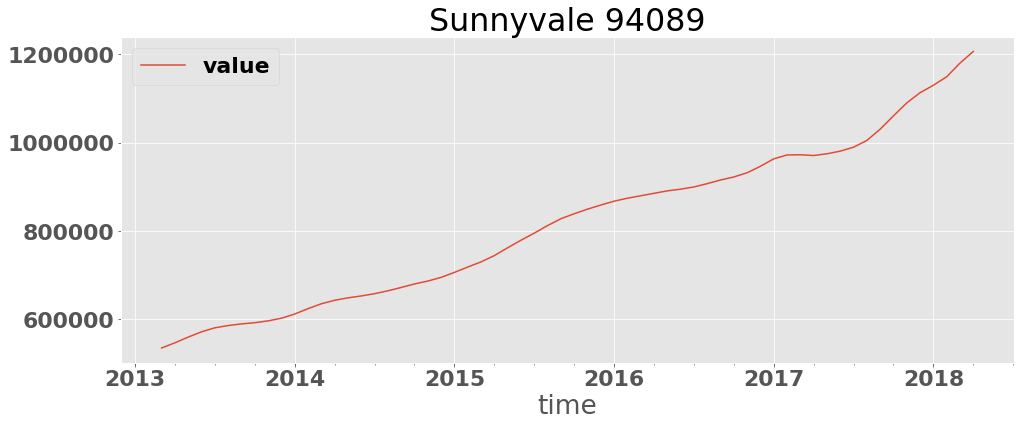

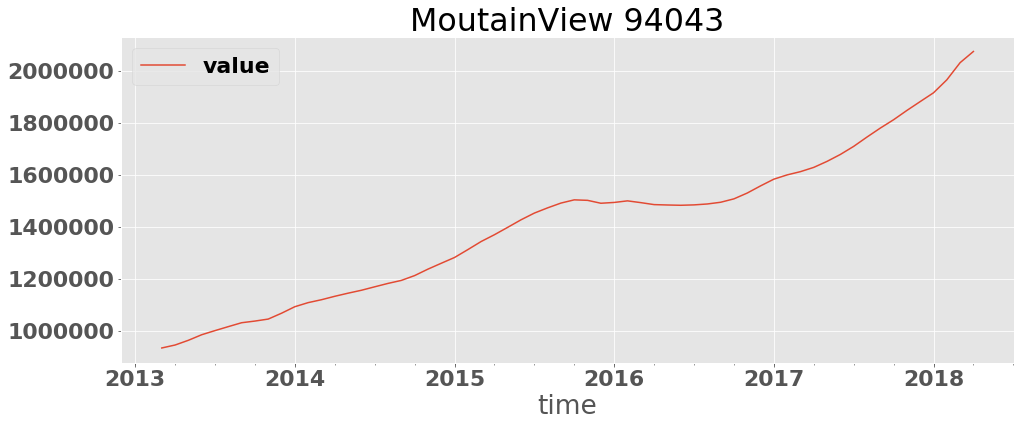

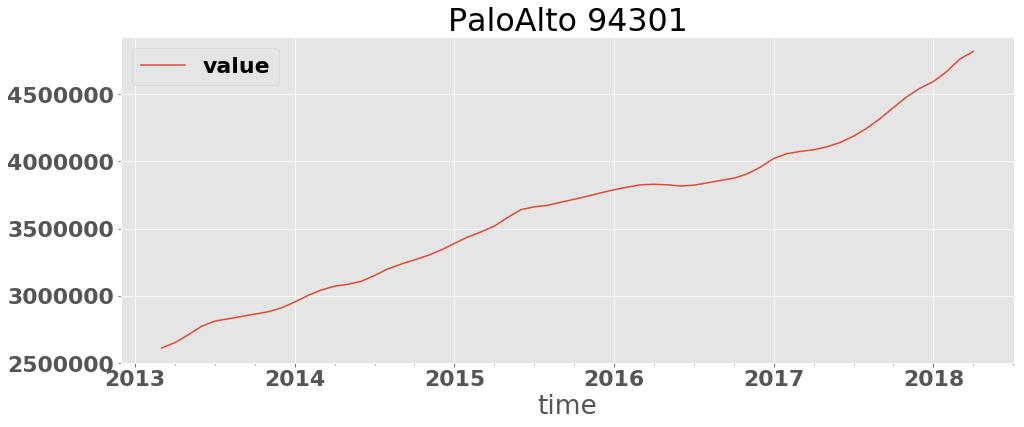

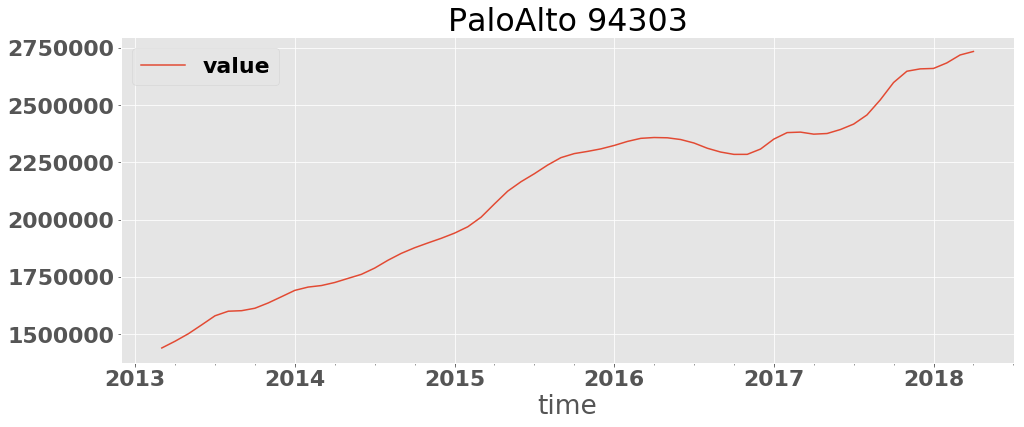

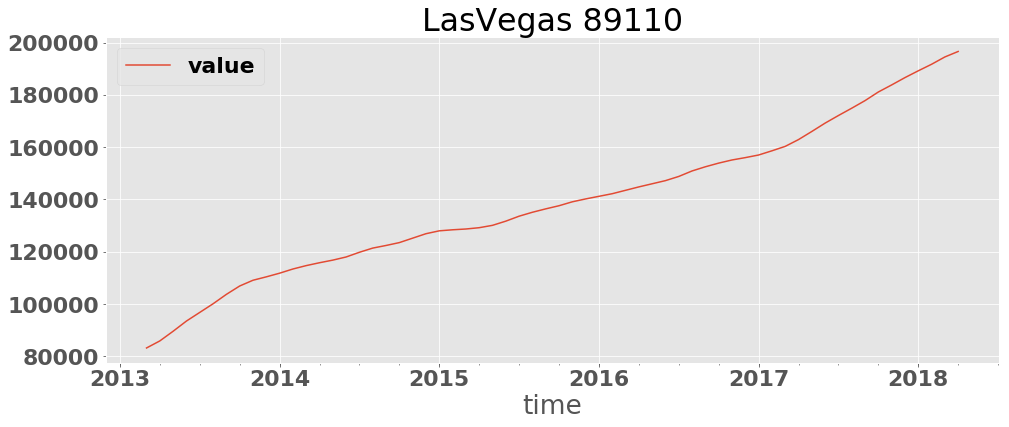

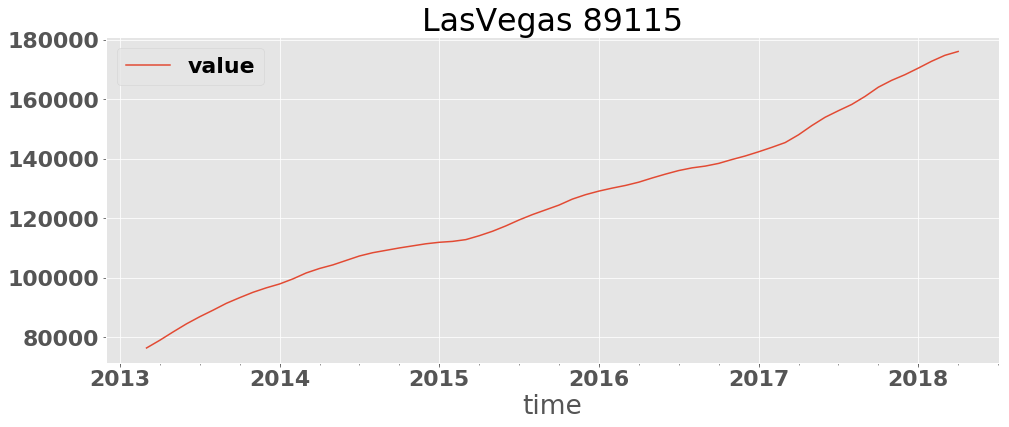

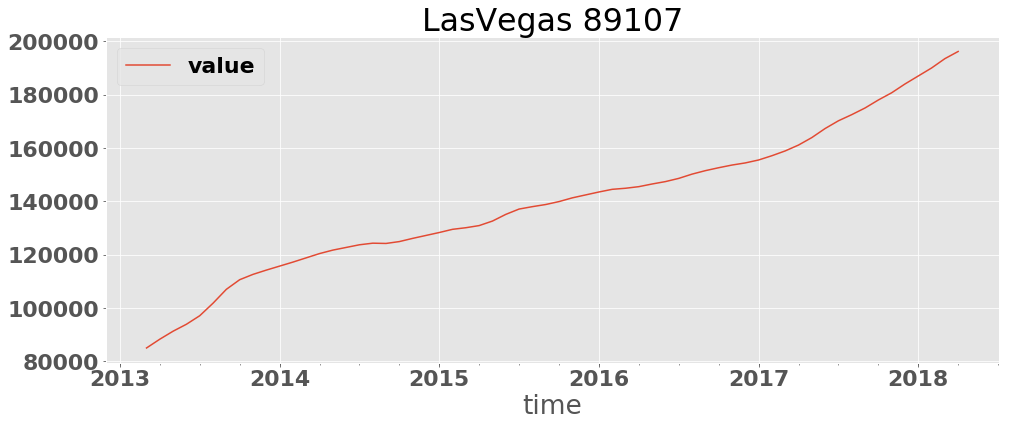

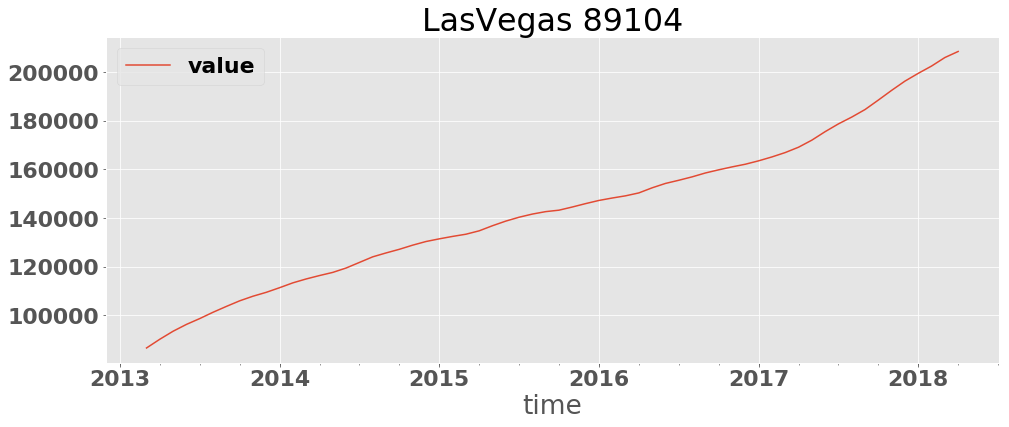

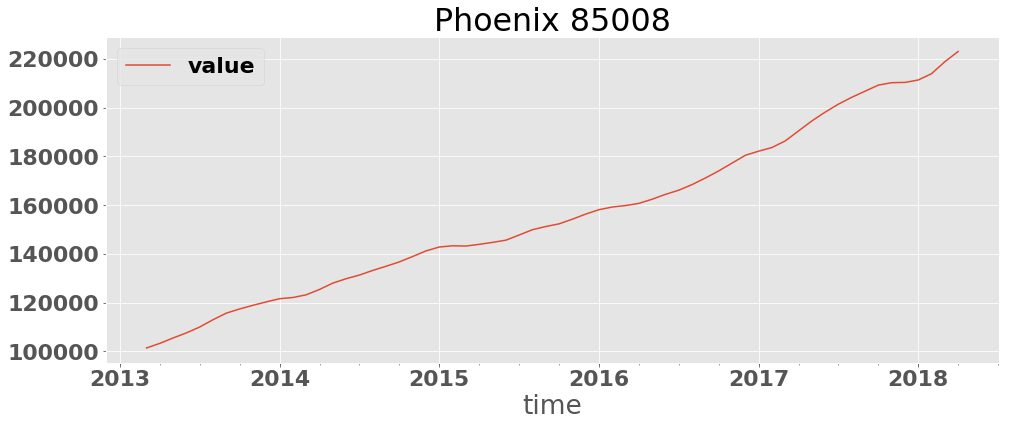

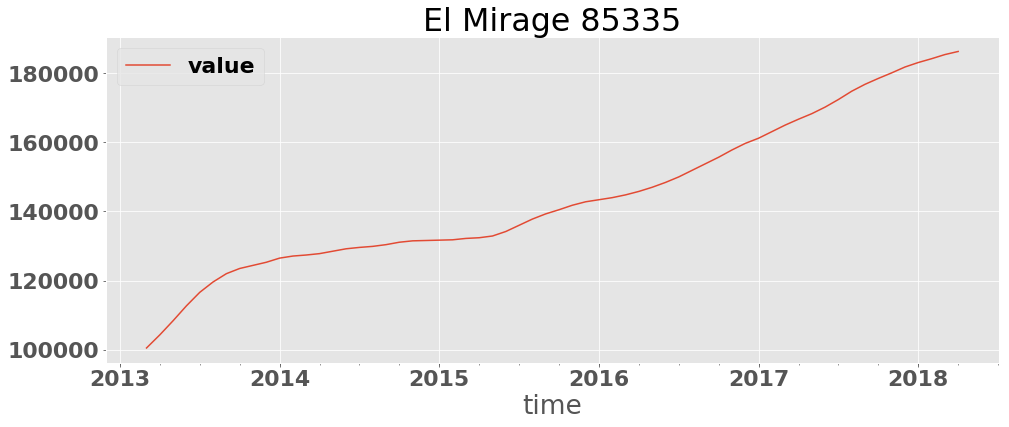

In [52]:
mSunnyvale.plot(title="Sunnyvale 94089", figsize = (16,6));
mMountainView.plot(title="MoutainView 94043",figsize = (16,6));
mPaloAlto301.plot(title="PaloAlto 94301",figsize = (16,6));
mPaloAlto303.plot(title="PaloAlto 94303",figsize = (16,6));
mLasVegas10.plot(title="LasVegas 89110",figsize = (16,6));
mLasVegas15.plot(title="LasVegas 89115",figsize = (16,6));
mLasVegas07.plot(title="LasVegas 89107",figsize = (16,6));
mLasVegas04.plot(title="LasVegas 89104",figsize = (16,6));
mPhoenix008.plot(title="Phoenix 85008",figsize = (16,6));
mElMirage.plot(title="El Mirage 85335",figsize = (16,6));

# Step 4d: Stationarity Check
In this section the 10 best zip codes will be checke for stationarity.  Most likely the time series data frames are not stationary, but it is good idea. Stationarity is when mean and variance are constant over time. The data will be plotted and the Dickey-Fuller test will be admininistered on each zip code.  A p-value will be provided by the Dickey-Fuller test which will determine stationarity or not.  The null hypothesis is that the data is NOT stationary, and will be accepted or rejected based on the p-value.

In [53]:
def stationarity_check(TS,name):
    ''' 
    This code is from the "Removing Trends" lab
    The input parameters are the time series data frame and the name of the zip code being checked
    The output parameter is a plot of the rolling statistic and results of the Dickey-Fuller test
    '''
    
    from statsmodels.tsa.stattools import adfuller
    
    '''Calculate rolling statistics'''
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    
    ''' Perform the Dickey Fuller Test '''
    dftest = adfuller(TS['value']) 
    
    '''Plot rolling statistics '''
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation for {}'.format(name),fontsize=25)
    plt.show(block=False)
    
    '''Print Dickey-Fuller test results'''
    print ('Results of Dickey-Fuller Test for {}:'.format(name))

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

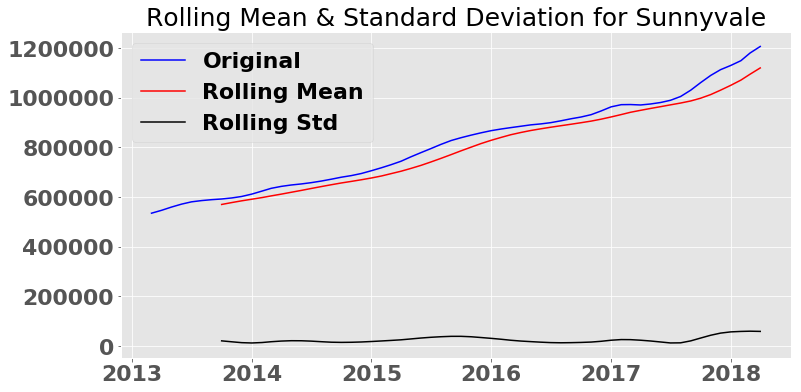

Results of Dickey-Fuller Test for Sunnyvale:
Test Statistic                  1.075601
p-value                         0.995003
#Lags Used                      9.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


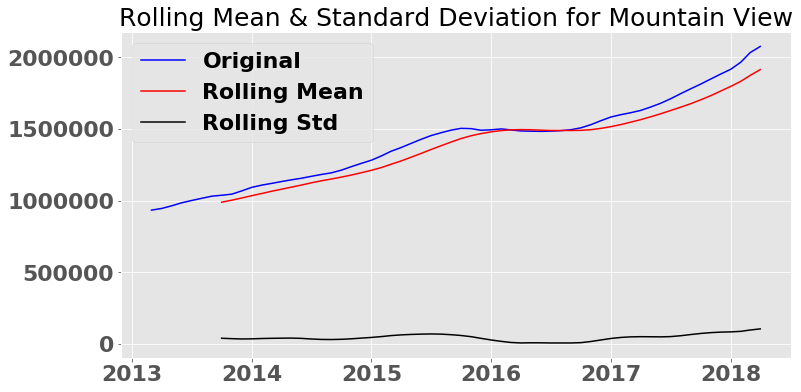

Results of Dickey-Fuller Test for Mountain View:
Test Statistic                  0.440619
p-value                         0.982952
#Lags Used                      7.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


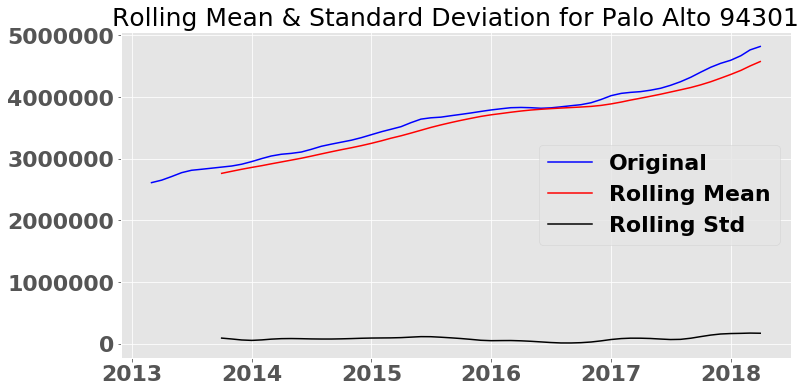

Results of Dickey-Fuller Test for Palo Alto 94301:
Test Statistic                  0.320238
p-value                         0.978254
#Lags Used                      9.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


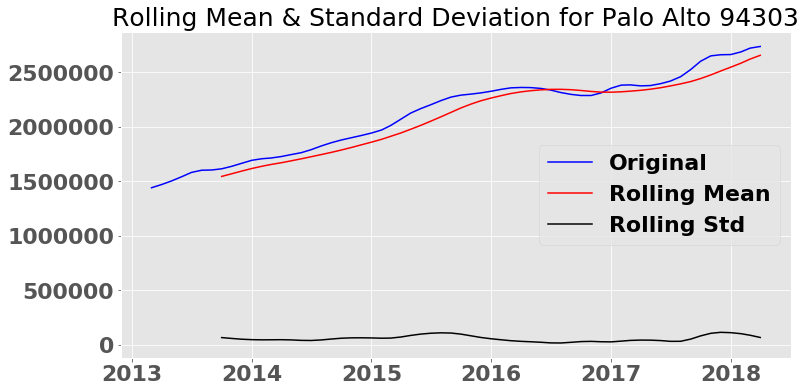

Results of Dickey-Fuller Test for Palo Alto 94303:
Test Statistic                 -1.117736
p-value                         0.707948
#Lags Used                      9.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


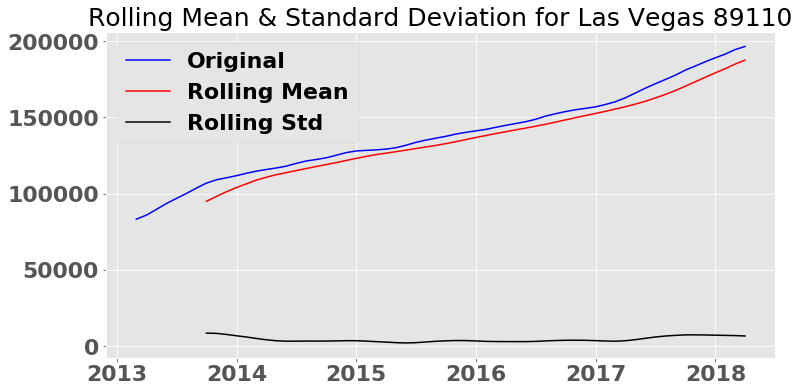

Results of Dickey-Fuller Test for Las Vegas 89110:
Test Statistic                  1.044928
p-value                         0.994718
#Lags Used                      2.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


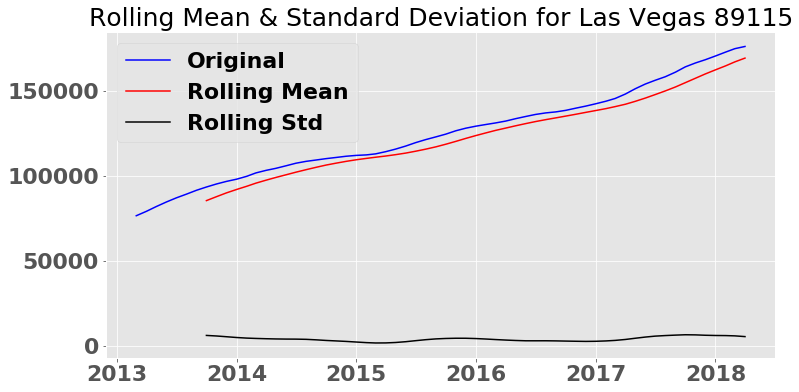

Results of Dickey-Fuller Test for Las Vegas 89115:
Test Statistic                  0.975680
p-value                         0.994003
#Lags Used                      6.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


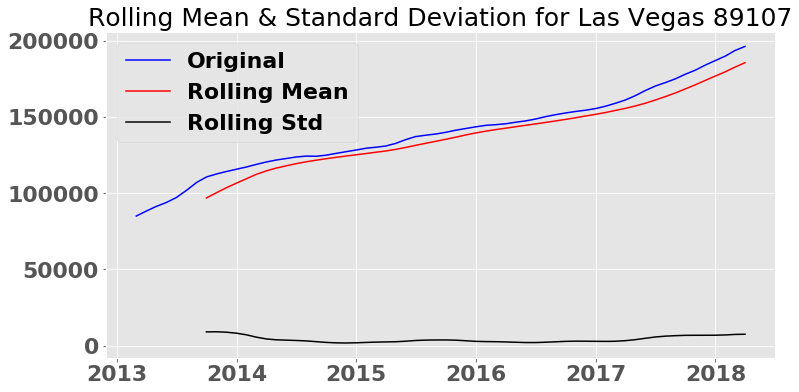

Results of Dickey-Fuller Test for Las Vegas 89107:
Test Statistic                  2.440267
p-value                         0.999028
#Lags Used                      5.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


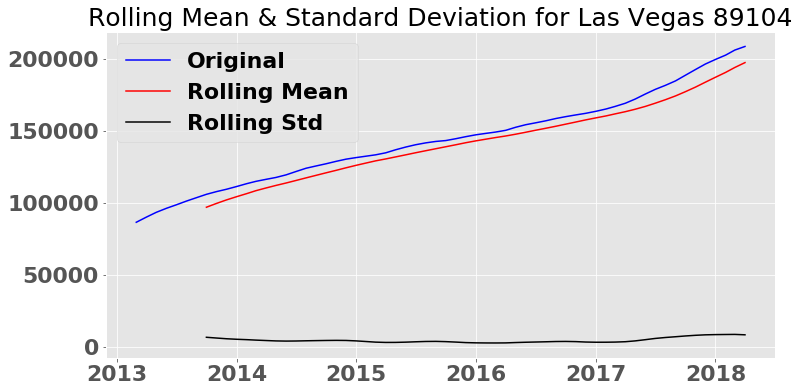

Results of Dickey-Fuller Test for Las Vegas 89104:
Test Statistic                  1.488800
p-value                         0.997482
#Lags Used                      3.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


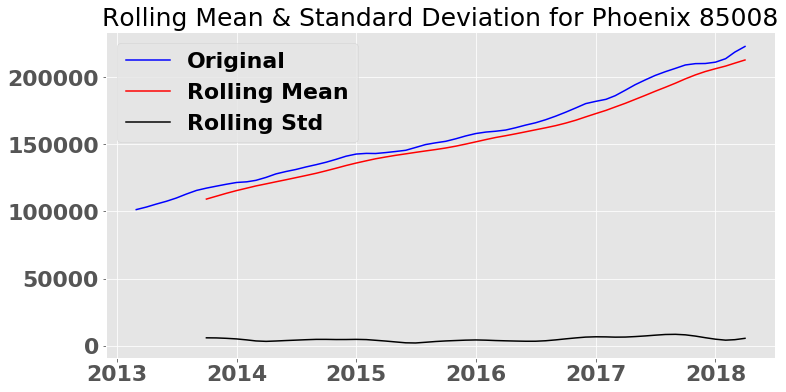

Results of Dickey-Fuller Test for Phoenix 85008:
Test Statistic                  1.413470
p-value                         0.997174
#Lags Used                      3.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


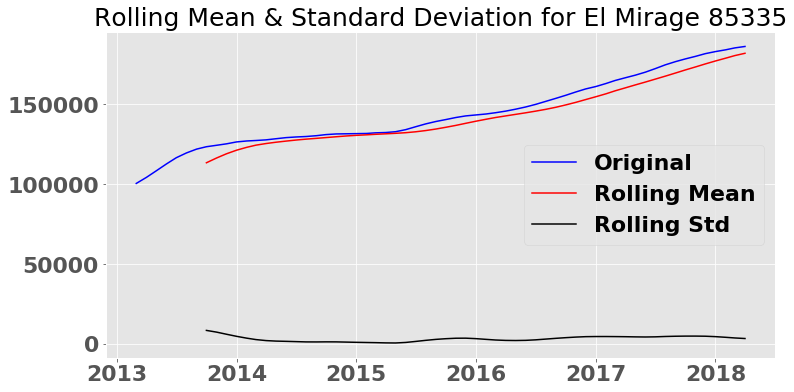

Results of Dickey-Fuller Test for El Mirage 85335:
Test Statistic                  0.577337
p-value                         0.987044
#Lags Used                      9.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


In [54]:
stationarity_check(mSunnyvale,"Sunnyvale")
stationarity_check(mMountainView,"Mountain View")
stationarity_check(mPaloAlto301,"Palo Alto 94301")
stationarity_check(mPaloAlto303,"Palo Alto 94303")
stationarity_check(mLasVegas10,"Las Vegas 89110")
stationarity_check(mLasVegas15,"Las Vegas 89115")
stationarity_check(mLasVegas07,"Las Vegas 89107")
stationarity_check(mLasVegas04,"Las Vegas 89104")
stationarity_check(mPhoenix008,"Phoenix 85008")
stationarity_check(mElMirage,"El Mirage 85335")

## Result of Stationarity check on time series data frames
The p-value from the Dickey-Fuller test is very high for all 10 zip codes (9 of them around 0.99-0.97 and one at 0.70), so we accept the null hypothesis and conclude the time series is not stationary.  

# Step 5: S/ARIMA Modeling
Sarima and Arima modeling are used on time series data to forecast when the data contains seasonal elements and trends.  The "s" in Sarima represents the "seasonal" element and is more robust than Arima for this reason.  Therefore, this project will utilize the sarima model.  

The first step will be determine the trend elements: p, d, q, P, D, Q and m.  The elements with the lowest calculated AIC will be used for sarima modeling and forecasting.

In [55]:
def sarima_elements(TS):
    ''' 
    This function will calculate the optimal trend elements for a time series data set
        and is called in the function sarima_model_with_plots
        
    The input parameter is the time series data set
    The output are the p,d,q,P,D,Q and m values based on the lowest AIC score
    
    This code was modeled after the code used in the S/Arima lab
    '''
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    
    warnings.filterwarnings('ignore')
    
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(TS,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

                output = mod.fit()
                ans.append([comb, combs, output.aic])
#                 print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
            except:
                continue
                
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    out = ans_df.loc[ans_df['aic'].idxmin()]
    print("The minimum AIC:")
    print(ans_df.loc[ans_df['aic'].idxmin()])
    return out

In [56]:
# test of function
#aic_sunnyvale = sarima_elements(mSunnyvale)

In [138]:
def sarima_model_with_plots(df,name, plots=False):
    
    '''
    This function calculates the 2 year forecast for a time series data set 
    The input parameters are the time series data frame, the name of town associated with the zip code
        and a boolean value if the plots are desired (Standardized residual, histogram plus estimated 
        density, normal Q-Q and Correlogram)
    The output parameter is the minimum AIC, the pdq/PDQS values, the output summary, the plots (if desired)
        and the 2 year forecast
    This code was modeled after the code used in the S/Arima lab
    '''
    
    '''call sarima_elements to get the pdq and PDQm'''
    aic = sarima_elements(df)
    
    
    SARIMA_MODEL = sm.tsa.statespace.SARIMAX(df,
                                order=aic[0],
                                seasonal_order=aic[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    output = SARIMA_MODEL.fit()
    print("Results for {}:".format(name))
    print(output.summary().tables[1])


    
    '''Get a forecast for 2 years out '''
    prediction = output.get_forecast(steps=24)
    
    ''' Get confidence intervals of forecasts '''
    pred_conf = prediction.conf_int()

    # print("Forecast for {} 2 years out: ".format(name), round(prediction.predicted_mean.max(),2))

    ''' Plot future predictions with confidence intervals'''
    ax = df['2013':].plot(label='Value', figsize=(20,20))
    prediction.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='blue', alpha=.25)
    ax.set_xlabel('Date',fontsize =20)
    ax.set_ylabel('Mean House Value', fontsize=20)
    plt.title("The {} Forecast".format(name), fontsize = 30)
    plt.legend()
    plt.show()
    
    if plots == True:
        output.summary().tables[1]
        output.plot_diagnostics(figsize=(20,20))
        plt.show()
    else:
        pass
        
    return (round(prediction.predicted_mean.max(),2))

## Sarima forecasting for 10 best zip codes

The minimum AIC:
pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic           694.018
Name: 59, dtype: object
Results for Sunnyvale:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7956      0.088      9.047      0.000       0.623       0.968
ma.L1          1.2678      0.114     11.149      0.000       1.045       1.491
ma.S.L12       0.0554      0.066      0.845      0.398      -0.073       0.184
sigma2      1.274e+07   5.73e-09   2.22e+15      0.000    1.27e+07    1.27e+07


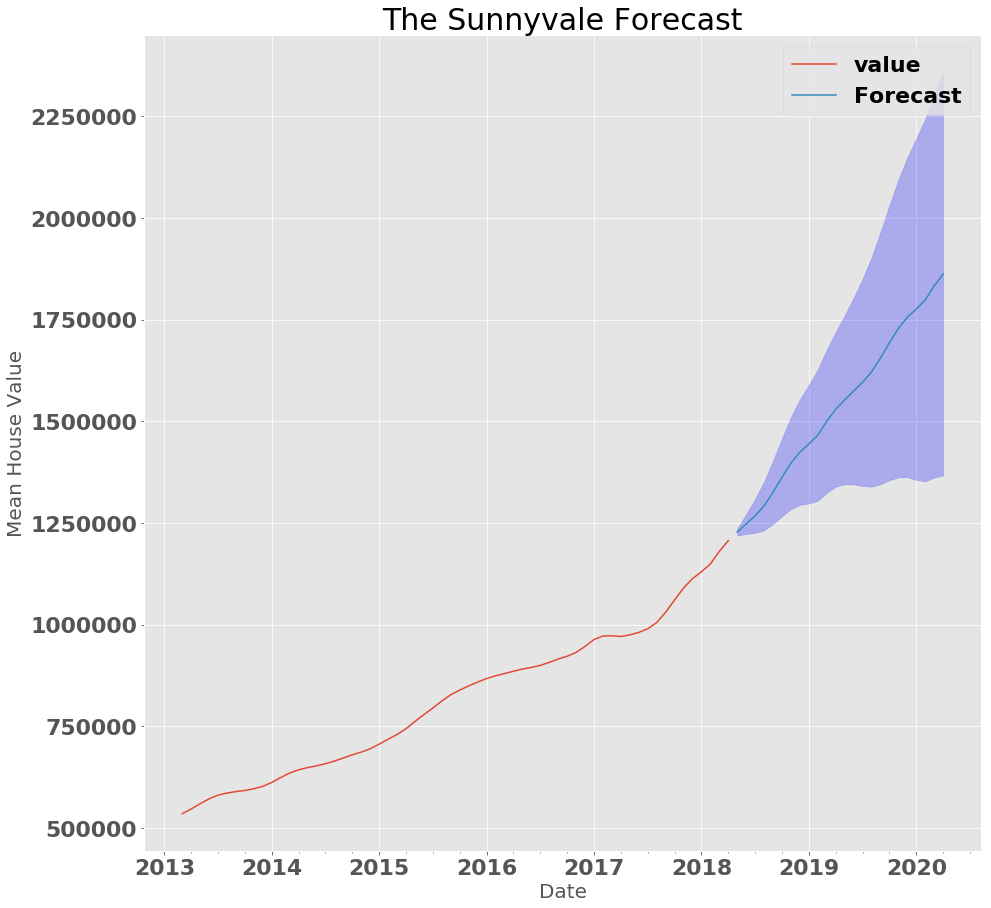

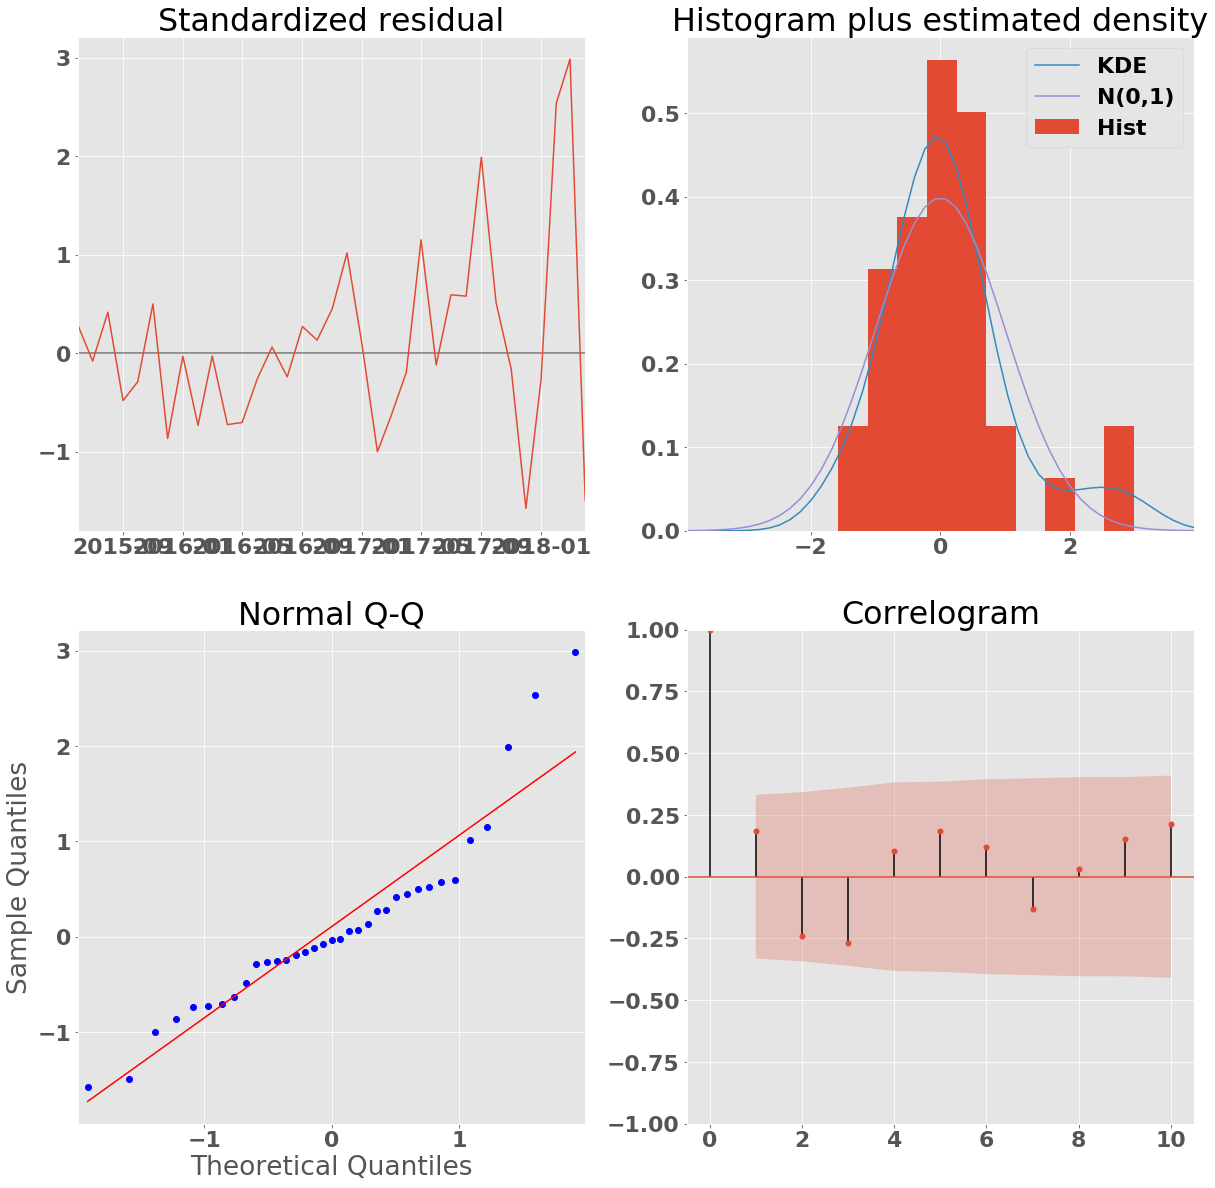

In [58]:
Sunnyvale_max = sarima_model_with_plots(mSunnyvale, "Sunnyvale",True)

The minimum AIC:
pdq         (1, 1, 0)
pdqs    (1, 1, 0, 12)
aic           769.758
Name: 54, dtype: object
Results for Mountain View:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9353      0.067     13.903      0.000       0.803       1.067
ar.S.L12      -0.5599      0.204     -2.751      0.006      -0.959      -0.161
sigma2      1.149e+08   8.33e-11   1.38e+18      0.000    1.15e+08    1.15e+08


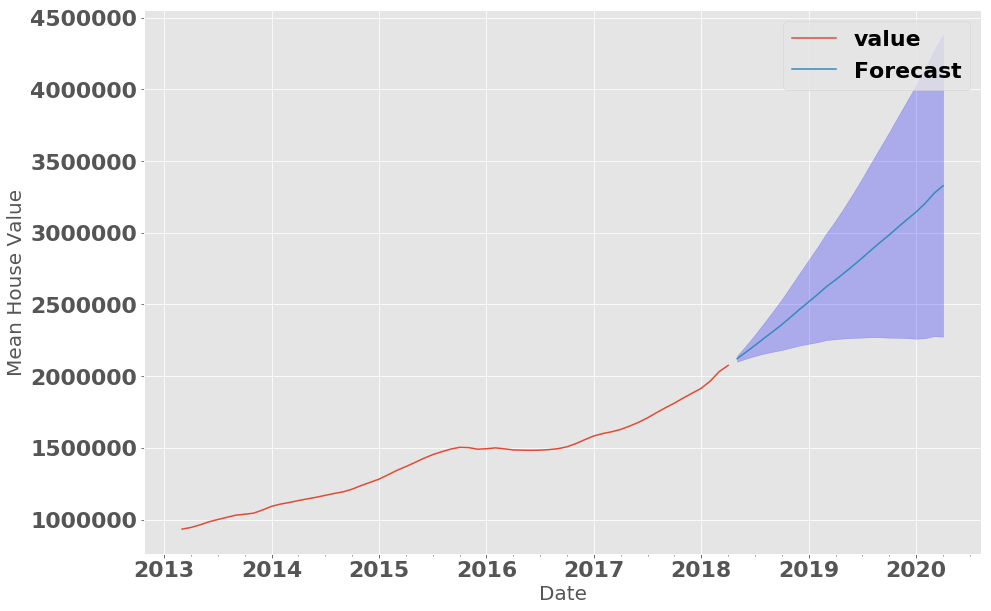

In [137]:
MountainView_max = sarima_model_with_plots(mMountainView, "Mountain View")

The minimum AIC:
pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic           790.761
Name: 59, dtype: object
Results for Palo Alto 94301:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6139      0.121      5.089      0.000       0.377       0.850
ma.L1          0.8085      0.020     40.315      0.000       0.769       0.848
ma.S.L12       0.0723      0.023      3.126      0.002       0.027       0.118
sigma2      2.339e+08   1.42e-10   1.64e+18      0.000    2.34e+08    2.34e+08


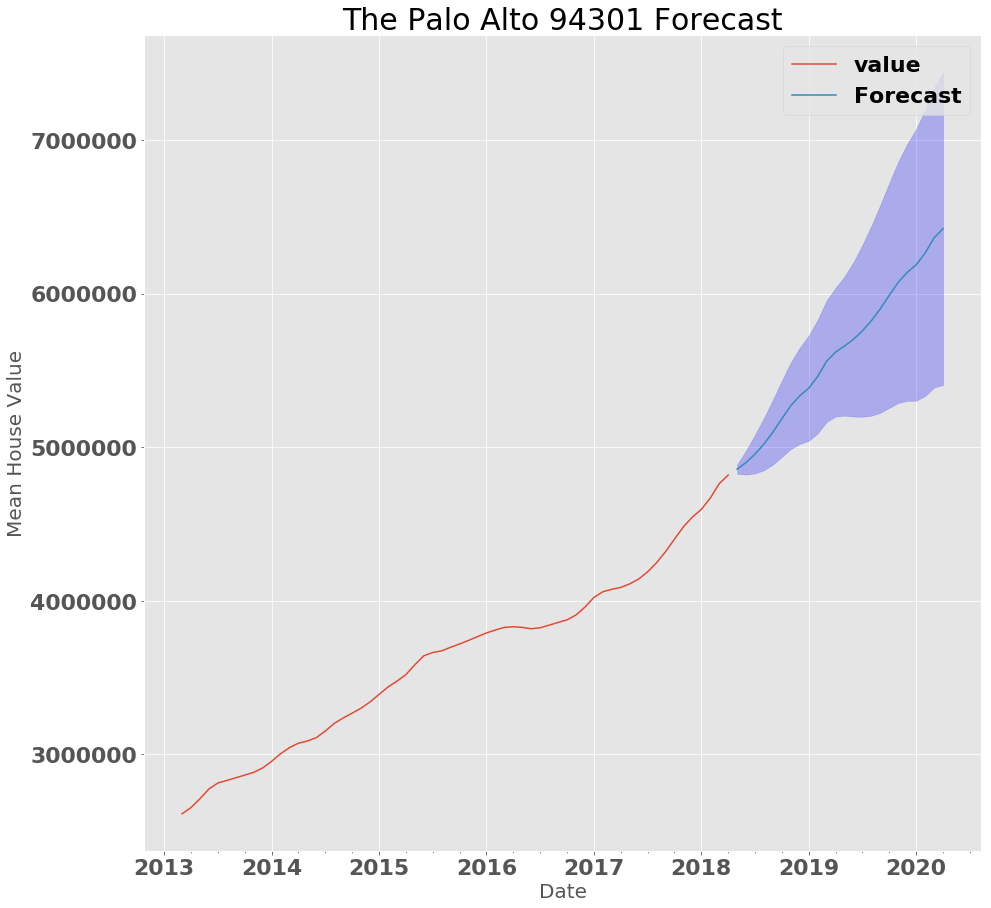

In [60]:
PaloAlto301_max = sarima_model_with_plots(mPaloAlto301, "Palo Alto 94301")

The minimum AIC:
pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic            772.84
Name: 59, dtype: object
Results for Palo Alto 94303:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7905      0.097      8.157      0.000       0.601       0.980
ma.L1          1.2349      0.058     21.356      0.000       1.122       1.348
ma.S.L12       0.0735      0.045      1.639      0.101      -0.014       0.161
sigma2      1.286e+08   1.19e-10   1.08e+18      0.000    1.29e+08    1.29e+08


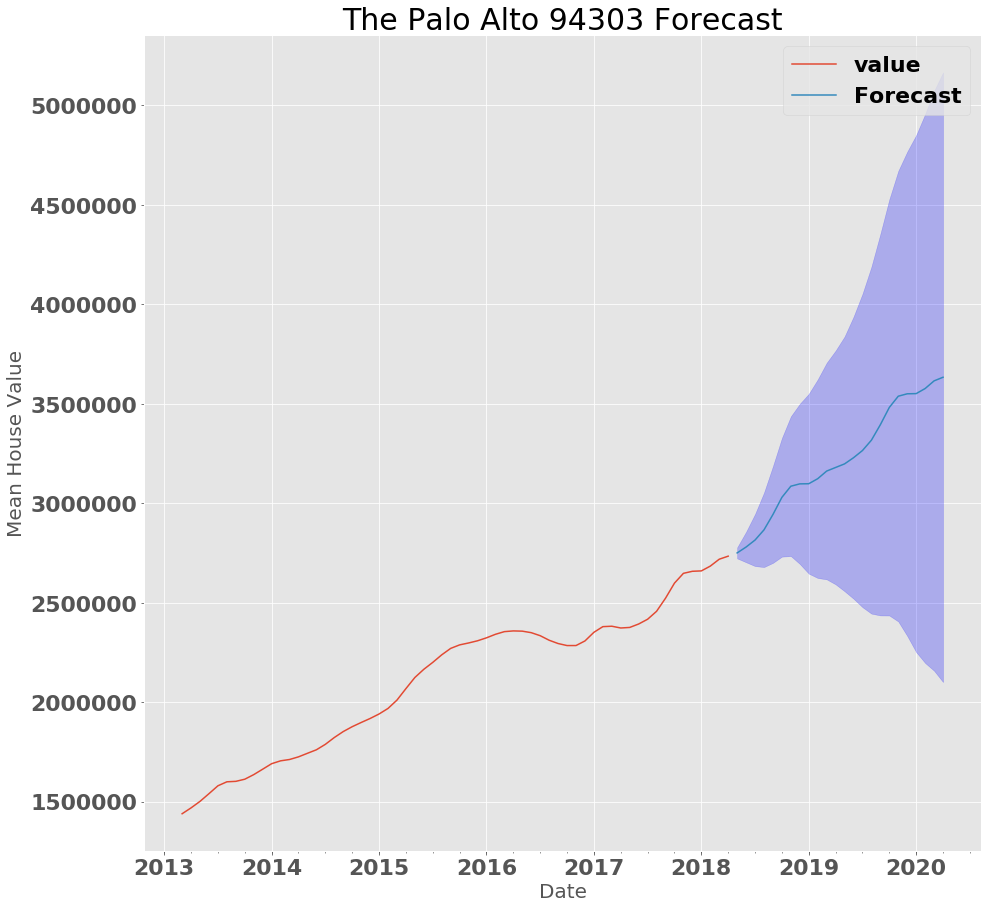

In [61]:
PaloAlto303_max = sarima_model_with_plots(mPaloAlto303, "Palo Alto 94303")

The minimum AIC:
pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic           526.087
Name: 63, dtype: object
Results for Las Vegas 89110:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8234      0.110      7.466      0.000       0.607       1.039
ma.L1          0.1933      0.169      1.145      0.252      -0.138       0.524
ar.S.L12       0.0717      0.029      2.438      0.015       0.014       0.129
ma.S.L12      -1.0250      3.398     -0.302      0.763      -7.686       5.636
sigma2      1.123e+05   3.95e+05      0.285      0.776   -6.61e+05    8.86e+05


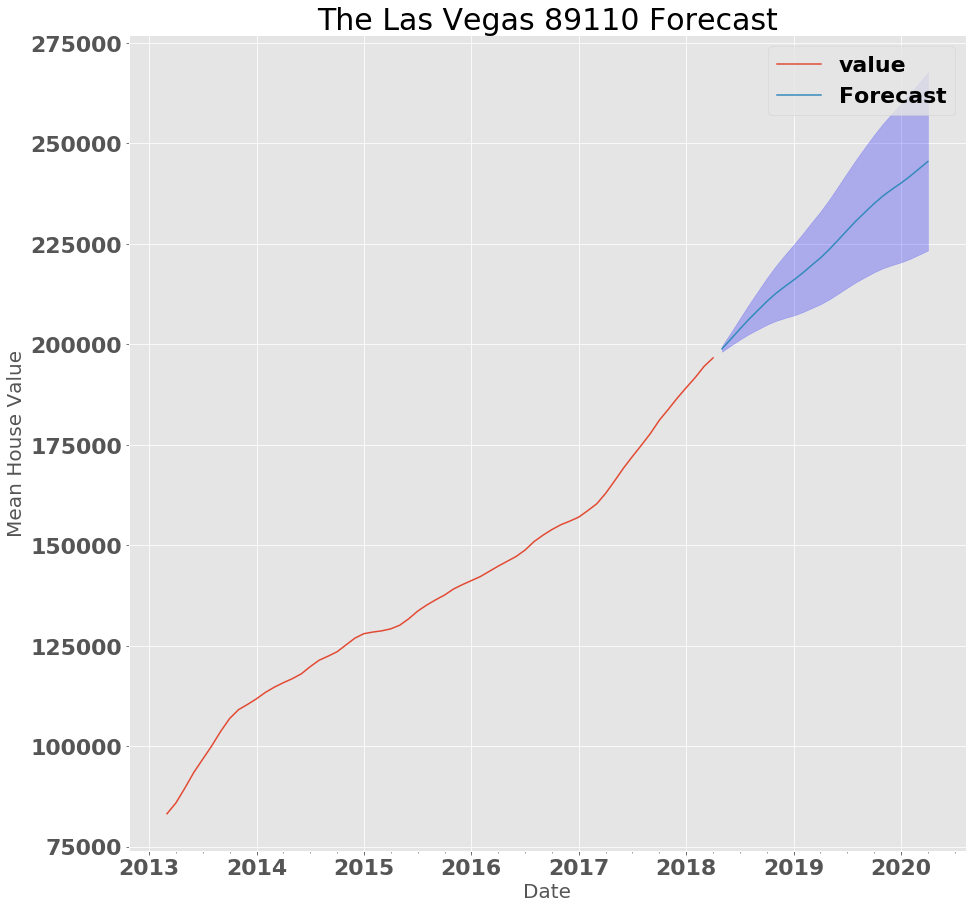

In [62]:
LasVegas10_max = sarima_model_with_plots(mLasVegas10, "Las Vegas 89110")

The minimum AIC:
pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic           526.384
Name: 59, dtype: object
Results for Las Vegas 89115:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7537      0.123      6.116      0.000       0.512       0.995
ma.L1          0.6097      0.164      3.728      0.000       0.289       0.930
ma.S.L12      -0.3714      0.109     -3.414      0.001      -0.585      -0.158
sigma2      1.417e+05   3.47e+04      4.080      0.000    7.36e+04     2.1e+05


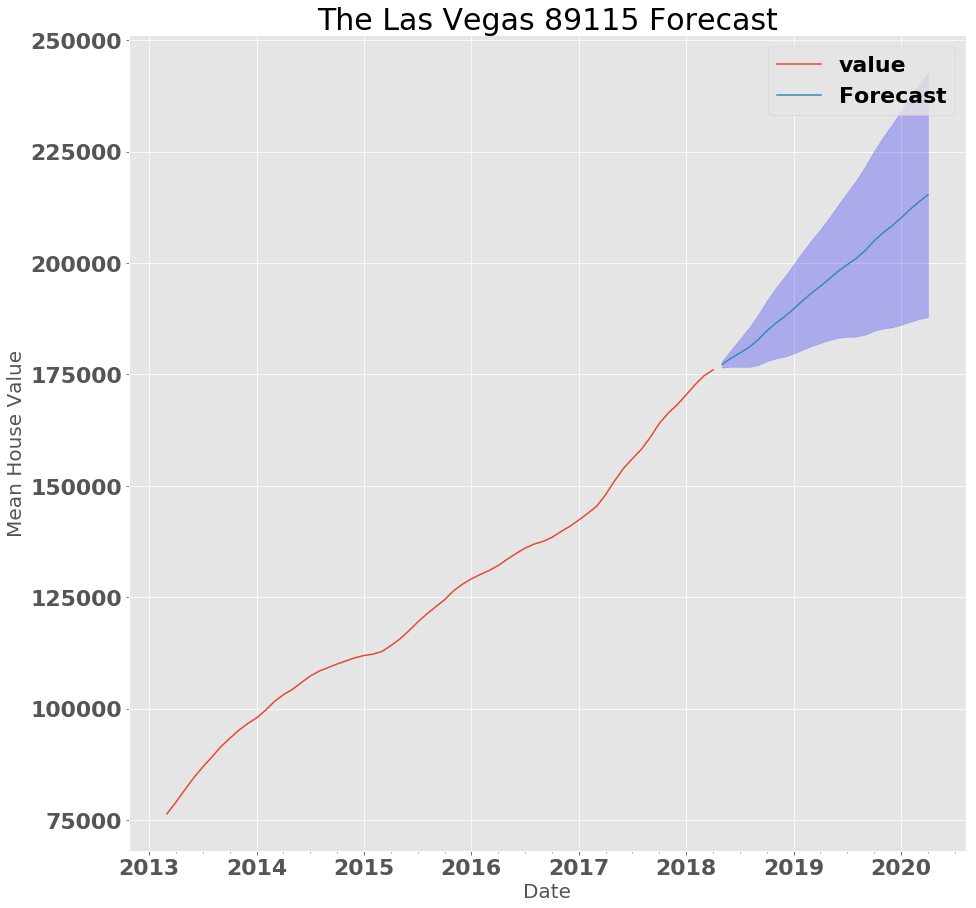

In [63]:
LasVegas15_max = sarima_model_with_plots(mLasVegas15, "Las Vegas 89115")

The minimum AIC:
pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic           549.899
Name: 63, dtype: object
Results for Las Vegas 89107:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6759      0.156      4.338      0.000       0.371       0.981
ma.L1          0.5961      0.201      2.968      0.003       0.202       0.990
ar.S.L12       0.0556      0.057      0.969      0.332      -0.057       0.168
ma.S.L12      -0.3679      0.167     -2.207      0.027      -0.695      -0.041
sigma2      3.803e+05   1.46e+05      2.601      0.009    9.37e+04    6.67e+05


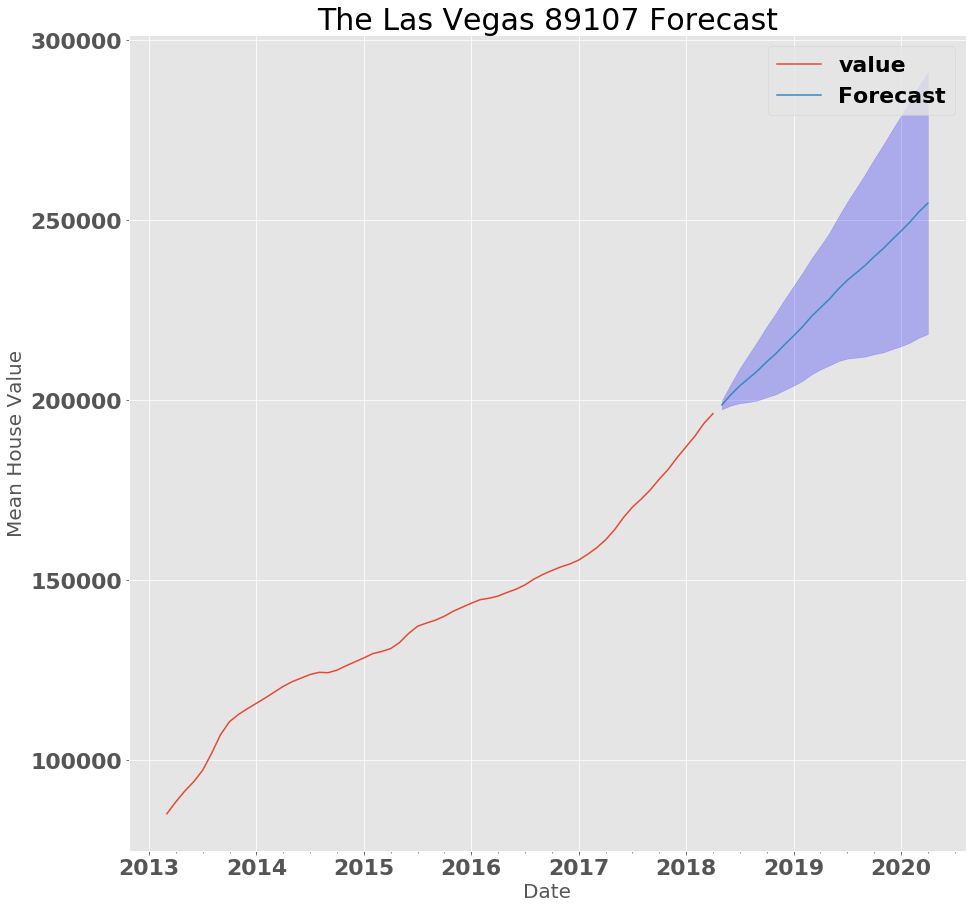

In [64]:
LasVegas07_max = sarima_model_with_plots(mLasVegas07, "Las Vegas 89107")

The minimum AIC:
pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic           536.245
Name: 59, dtype: object
Results for Las Vegas 89104:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8590      0.103      8.369      0.000       0.658       1.060
ma.L1          0.3695      0.250      1.478      0.139      -0.120       0.859
ma.S.L12      -0.3818      0.145     -2.627      0.009      -0.667      -0.097
sigma2      1.985e+05   4.94e+04      4.018      0.000    1.02e+05    2.95e+05


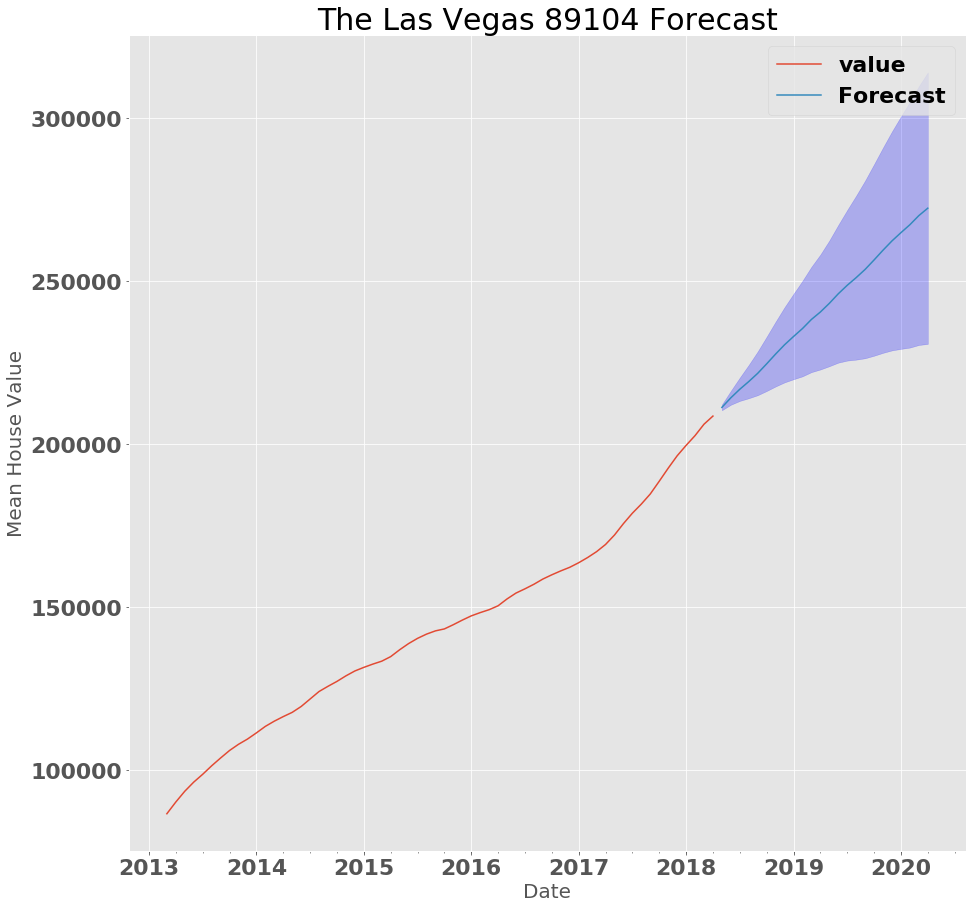

In [65]:
LasVegas04_max = sarima_model_with_plots(mLasVegas04, "Las Vegas 89104")

The minimum AIC:
pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic           572.204
Name: 63, dtype: object
Results for Phoenix 85008:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4864      0.169      2.883      0.004       0.156       0.817
ma.L1          0.6855      0.209      3.279      0.001       0.276       1.095
ar.S.L12       0.0587      0.045      1.299      0.194      -0.030       0.147
ma.S.L12      -0.4128      0.112     -3.672      0.000      -0.633      -0.192
sigma2       5.91e+05   1.69e+05      3.500      0.000     2.6e+05    9.22e+05


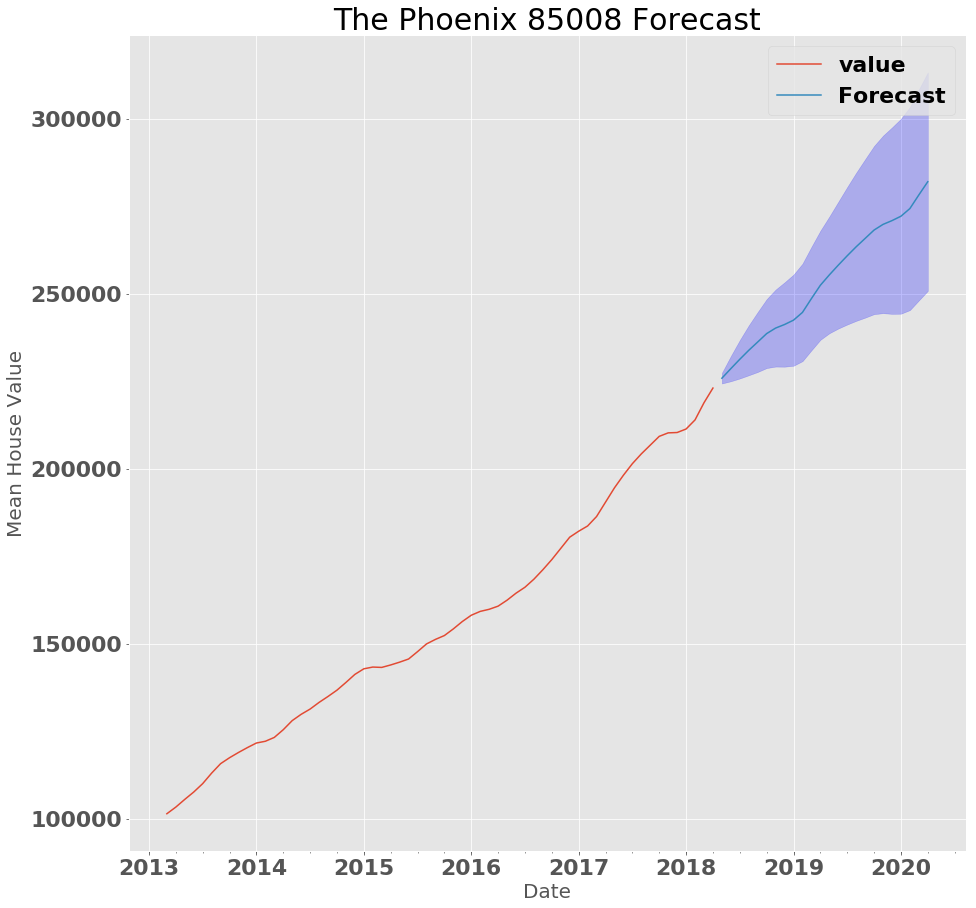

In [66]:
Phoenix008_max = sarima_model_with_plots(mPhoenix008, "Phoenix 85008")

The minimum AIC:
pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic           498.307
Name: 63, dtype: object
Results for El Mirage:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6908      0.187      3.703      0.000       0.325       1.056
ma.L1          0.6078      0.187      3.243      0.001       0.240       0.975
ar.S.L12       0.0307      0.021      1.449      0.147      -0.011       0.072
ma.S.L12      -0.5298      0.230     -2.305      0.021      -0.980      -0.079
sigma2      7.029e+04   2.11e+04      3.324      0.001    2.88e+04    1.12e+05


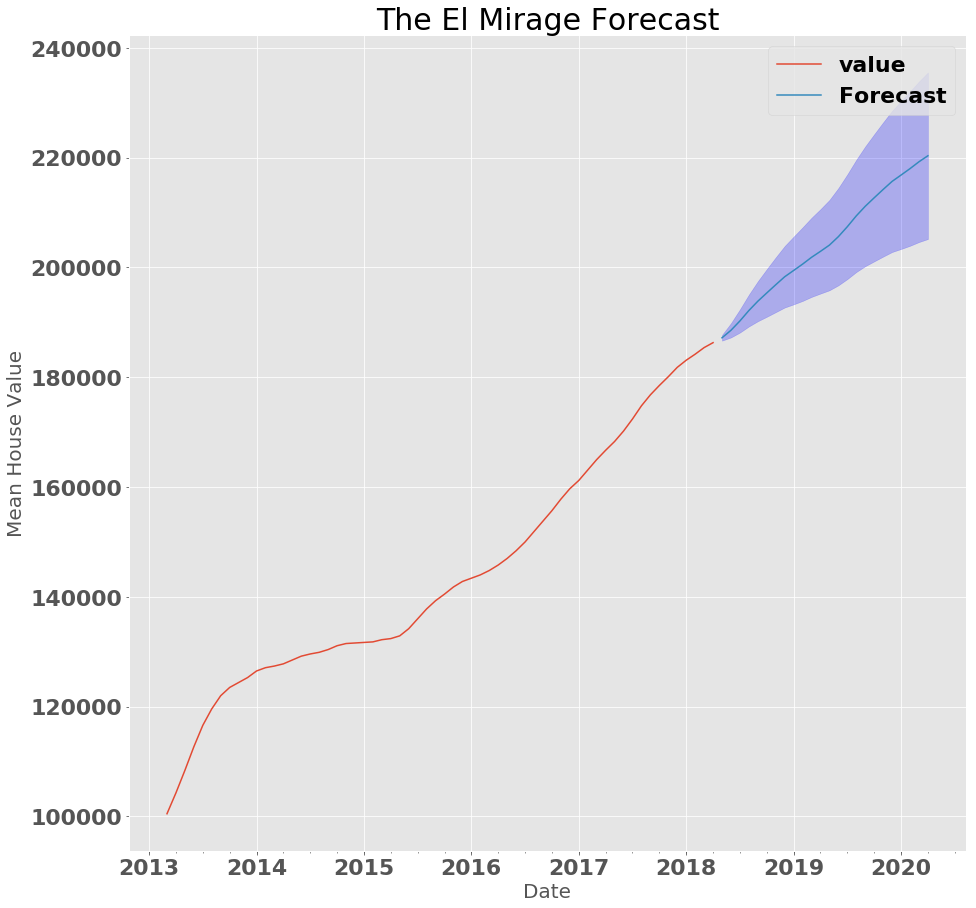

In [67]:
ElMirage_max = sarima_model_with_plots(mElMirage, "El Mirage")

## Compare ROI for 10 best zip codes
In this section, the 2-year forecasted house values are used to calculate the forecasted growth ROI to determine the final five best zip codes.  

In [103]:
forecast = [Sunnyvale_max, MountainView_max,PaloAlto301_max,PaloAlto303_max,LasVegas10_max, LasVegas15_max,LasVegas07_max,LasVegas04_max,Phoenix008_max,ElMirage_max]
observed = [mSunnyvale.tail(1),mMountainView.tail(1), mPaloAlto301.tail(1),mPaloAlto303.tail(1),mLasVegas10.tail(1),mLasVegas15.tail(1),mLasVegas07.tail(1),mLasVegas04.tail(1),mPhoenix008.tail(1),mElMirage.tail(1)]
names = ['Sunnyvale 94089','Mountain View 94043', 'Palo Alto 94301', 'Palo Alto 94303', 'Las Vegas 89110','Las Vegas 89115','Las Vegas 89107','Las Vegas 89104','Phoenix 85008','El Mirage 85335']

tobserved = [mSunnyvale,mMountainView, mPaloAlto301,mPaloAlto303,mLasVegas10,mLasVegas15,mLasVegas07,mLasVegas04,mPhoenix008,mElMirage]


In [104]:
# float(mSunnyvale.tail(1).values)

In [105]:
# float(tobserved[0].tail(1).values)

In [116]:
def results(observed,forecast,names):
    ''' 
    This function is used to calculate the 2 year forecast ROI for the 10 zipcodes and plot the results
    The input parameters are the time series data, the list of maximum forecasted values and the names of the cities
        for the 10 zip codes
    The output parameter is a graphical representation of the top 5 zipcodes (highest ROI) and the bottom 5 zip codes
    '''
    
    size = len(names)
    
    final = {}

    '''Calculate the 2 year forecasted ROI, store zip code and ROI in a dictionary'''
    for i in range(size):
#         o = float(observed[i].values)
#         roi = (forecast[i] - observed[i]) / observed[i]
        o = float(tobserved[i].tail(1).values)
        roi = (forecast[i] - o)/o
        clean_roi = round(roi * 100,2)
#         print("The ROI for", names[i], "is", clean_roi, "%")
#         print("-----")
        final.update({names[i]: clean_roi})

    '''Sort the dictionary'''
    sorted_d = sorted(final.items(), key=lambda x: (x[1],x[0]), reverse=True)
    top = sorted_d[:5]
#     print(top)
    bottom = sorted_d[5:]
#     print(bottom)
    
    '''Plot the top 5 and bottom 5 zip codes'''
    x1_val = [x[0] for x in top]
    y1_val = [x[1] for x in top]
    x2_val = [x[0] for x in bottom]
    y2_val = [x[1] for x in bottom]

#     fig, ax = plt.subplots(figsize=(15,15))
    fig, ax = plt.subplots(figsize=(20,10))
    plt.bar(x1_val,y1_val,color = '#1c3290', label="Top 5 Zip Codes")
    plt.bar(x2_val,y2_val, color = "#907A1C", label="Bottom 5 Zip Codes")
#     plt.title("Top 10 US Zip Codes", fontsize = 35)
    plt.xticks(rotation=90, fontsize=15)
    plt.xlabel("", fontsize=20)
    plt.ylabel("Forecasted 2 year ROI in %", fontsize = 20)
    plt.legend()
    plt.show()
    

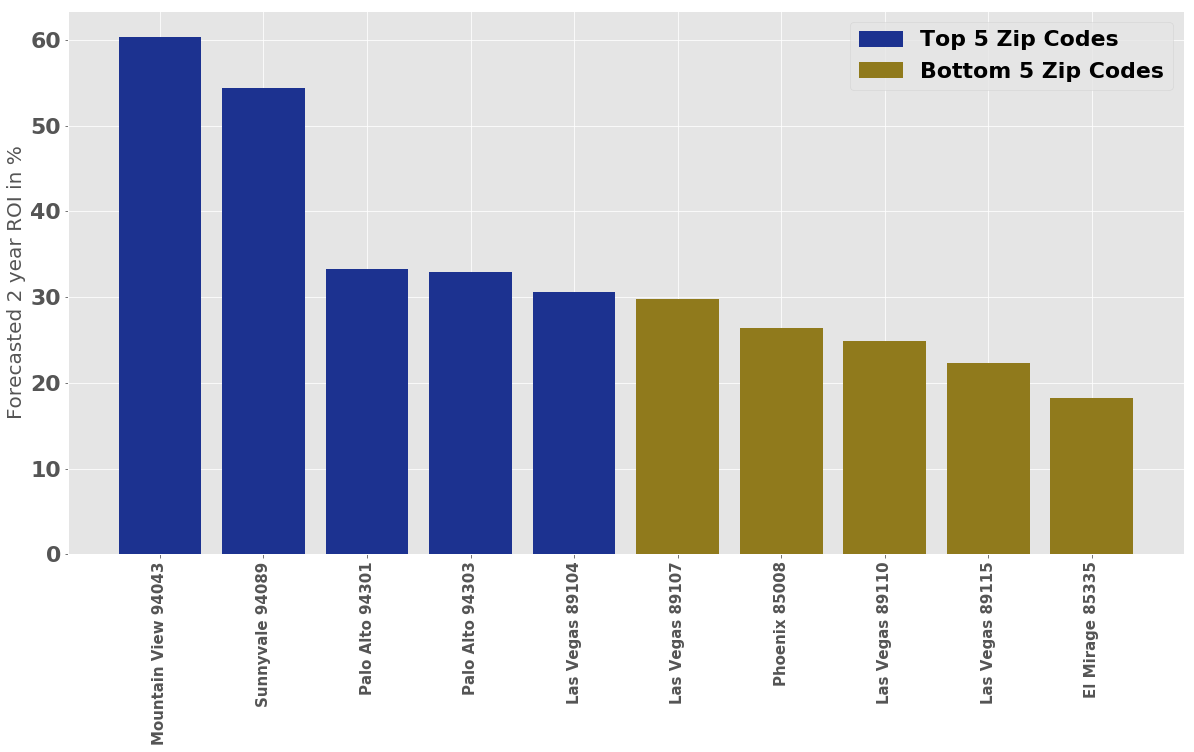

In [117]:
results(observed,forecast,names)

# Conclusion and Business Recommendations

The goal of this market analysis is to identify the 5 best zip codes in the United States and evaluate their potential future growth for investment purposes. For this investigation, the term "best" is defined as a demonstrated high-growth ROI following the 2008 market crash and a high forecasted area for growth potential. 

The data has been sourced from Zillow, a leading real estate and rental marketplace dedicated to empowering consumers with data and knowledge.  The original data set is comprised of house sales over a 22 year span in over 14,000 zip codes in the United States.  About 7% of the total data set was dropped because of null or missing values. 

The methodology to arrive at the 5 best zip codes occurd in 3 defined steps.  First, the data set was used to calculate the return on investment (ROI) of each zip code from the time period following the 2008 market crash until current day. The house prices after the crash in 2008 were stagnant until March 2011, which will be the recovery data used for this analysis. The 13,684 zip codes were then ranked according to the ROI in descending order.

The second step was to conduct market research to identify the real estate markets forecasted to have high growth potential in 2019.  The forecast took into consideration the growth of new residents, new jobs, and home values.  Twenty real estate markets to watch in 2019 were identified.  Based on the data and market research, 10 zip codes in California, Arizona and Nevada were identified as potentially the best in the United States.   

The third and final step was to analyze the data for trends and model the data to forecast for potential growth in 2019 and 2020.  As the result, the five zip codes with the highest forecasted 2-year ROI are: Mountian View, CA (94043), Sunnyvale, CA (98089), Palo Alto, CA (94301 and 94302) and Las Vegas, NV (89104).  A close sixth contender was also in Las Vegas, NV (89107).  

The recommendation of this analysis for a real estate investor interested in the best zip codes in the United States for the highest growth potential based on data forecasts and market research are the following zip codes:
 - Mountain View, CA (94043)
 - Sunnyval, CA (94089)
 - Palo Alto, CA (94301)
 - Palo Alto, CA (94303)
 - Las Vegas, NV (89104)
 - Las Vegas, NV (89107)


# Mod 4 Project - Starter Notebook
This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset.

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing.

NOTE: The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

## Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project.

## Wide Format vs Long Format
If you take a look at the format of the data in zillow_data.csv, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample:


You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called Wide Format, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to Long Format. Reshaped into long format, the dataframe above would now look like:


There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is pd.melt(), and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format.

## Helper Functions Provided
Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, melt_data(), to help you with this step below. Also provided is:

get_datetimes(), a function to deal with converting the column values for datetimes as a pandas series of datetime objects
Some good parameters for matplotlib to help make your visualizations more readable.
Good luck!

# Code Remnents
Code that I wrote but did not want to delete

In [73]:
# Helper function provided and not used

# def get_datetimes(df):
#     return pd.to_datetime(df.columns.values[7:272], format='%Y-%m')

In [74]:
# time = get_datetimes(data)
# time

In [75]:
# display(data.t_growth.sort_values(ascending=False).head(30))
# display(data.sort_values('growth2',ascending=False).head(10))

In [76]:
# IDzip = data.loc[(data['City'] == 'Sherrelwood') & (data['State'] == 'CO')]
# display(IDzip)

In [77]:
# https://www.housingwire.com/articles/49731-here-are-2019s-10-hottest-zip-codes/

In [78]:
# MAzip = data.loc[(data['CountyName'] == 'Middlesex') & (data['State'] == 'MA')]
# display(MAzip)
# display(MAzip.growth.sort_values(ascending=False).head(30))
# display(MAzip.sort_values('growth',ascending=False).head(10)) #74 rows
# display(data.growth.head())
# display("null values:",MAzip.growth.isna().sum())
# data.growth.sort_values(ascending=False).head(10)
# display(MAzip['1996-04'].dtype)

In [79]:
# MAzip['1996-04'] = MAzip.apply(get_datetimes, axis=1)
# MAzip.loc[:,'1996-04':'2018-04'] = MAzip.apply(get_datetimes, axis=1)
#MAzip.loc[:,'1996-04':'2018-04'] = pd.to_datetime(MAzip.loc[:,'1996-04':'2018-04'], format='%Y-%m')
# MAzip['1996-04'] = pd.to_datetime(MAzip['1996-04'], format='%Y-%m')
# MAzip.loc[MAzip['1996-04'] == pd.to_datetime(MAzip['1996-04'], format='%Y-%m')]
#display(MAzip['1996-04'].dtype)

In [80]:
#SanJose.plot.bar(x='RegionName', y='growth2', figsize=(15,15))

# SanJose.groupby(['RegionName'])['price'].mean().sort_values().plot(kind='barh', figsize=(15,15))
# SanJose[['RegionName','growth2']].sort_values(by='growth2',ascending=False).plot(kind='bar',figsize=(15,15))

In [81]:
# Sarima code

# p = d = q = range(0, 2)
# pdq = list(itertools.product(p, d, q))
# pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# ans = []
# for comb in pdq:
#     for combs in pdqs:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(rf_temp,
#                                             order=comb,
#                                             seasonal_order=combs,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             output = mod.fit()
#             ans.append([comb, combs, output.aic])
#             print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
#         except:
#             continue

# ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
# ans_df.loc[ans_df['aic'].idxmin()]

In [82]:
# SARIMA_MODEL = sm.tsa.statespace.SARIMAX(mSunnyvale,
#                                 order=(1, 1, 1),
#                                 seasonal_order=(0, 1, 1, 12),
#                                 enforce_stationarity=False,
#                                 enforce_invertibility=False)

# output = ARIMA_MODEL.fit()

# print(output.summary().tables[1])
# # print(output.summary())

In [83]:
# output.plot_diagnostics(figsize=(20, 20))
# plt.show()

# pred = output.get_prediction(start=pd.to_datetime('2018-05-01'), dynamic=False)
# pred_conf = pred.conf_int()

# # Get a forecast for 2 years out
# prediction = output.get_forecast(steps=24)
# # Get confidence intervals of forecasts
# pred_conf = prediction.conf_int()

# Plot real vs predicted values along with confidence interval

# rcParams['figure.figsize'] = 15, 6

# #Plot observed values
# ax = mSunnyvale['2011-03-01':].plot(label='observed')

# #Plot predicted values
# pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

# #Plot the range for confidence intervals
# ax.fill_between(np.array(pred_conf.index, dtype=float),
#                 pred_conf.iloc[:, 0].values,
#                 pred_conf.iloc[:, 1].values, color='g', alpha=.5)

# #Set axes labels
# ax.set_xlabel('Date')
# ax.set_ylabel('')
# plt.legend()

# plt.show()


# # Plot future predictions with confidence intervals
# ax = mSunnyvale['2013':].plot(label='observed', figsize=(15,15))
# prediction.predicted_mean.plot(ax=ax, label='Forecast')
# ax.fill_between(pred_conf.index,
#                 pred_conf.iloc[:, 0],
#                 pred_conf.iloc[:, 1], color='blue', alpha=.25)
# ax.set_xlabel('Date')
# ax.set_ylabel('Mean Sale Price')
# plt.legend()
# plt.show()

In [84]:
#     x,y = zip(*super_sorted)
#     plt.bar(x,y, color, label = "")
#     plt.title("Top 5 US Zip Codes", fontsize = 35)
#     plt.xlabel("Zip Codes", fontsize=30)
#     plt.ylabel("Growth in ROI", fontsize = 25)
#     plt.legend()
#     plt.show()
    
#     result.plot.bar(x='RegionName', y='growth2', figsize=(10,10))
#     plt.title('Top 13 Zipcodes in US: CA, AZ and NV', fontsize=25)
#     plt.xlabel('zip codes')
#     plt.legend('')
#     plt.ylabel('Growth percentage')
    
#     print("The top 5 zip codes are: ")
#     return top
        
#         a = observed[i]
#         a = observed[i].iloc[-1]
#         b = (forecast[i] - a)/(a)
        
#     sorted_d = dict(sorted(final.items(), key=operator.itemgetter(0),reverse=True))